In [1]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle
import ROOT
import math
import numpy as np
import sys
import glob
sys.path.append('/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/python_tools')
from ROOT_tools import ROOT_tools
from MultiPlotter import MultiPlotter
from ROOT2Pandas import Converter
from SampleManager import Sample, Manager
tool = ROOT_tools()

Welcome to JupyROOT 6.20/00


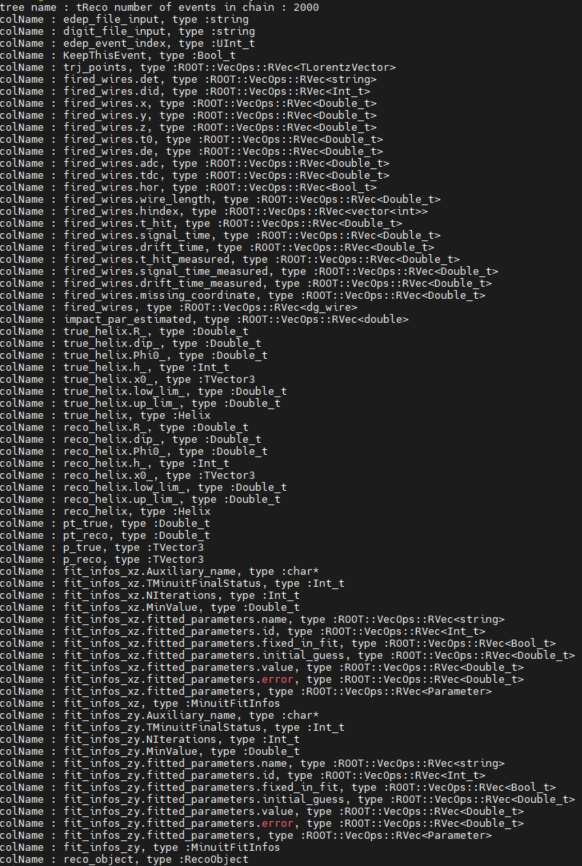

In [2]:
folder = "/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/DriftReco/Wires_cut/"
production = glob.glob(f"{folder}/*.to.*00.drift-reco.analysed.root")
production

['/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/DriftReco/Wires_cut/events-in-SANDtracker.200.to.300.drift-reco.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/DriftReco/Wires_cut/events-in-SANDtracker.700.to.800.drift-reco.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/DriftReco/Wires_cut/events-in-SANDtracker.400.to.500.drift-reco.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/DriftReco/Wires_cut/events-in-SANDtracker.800.to.900.drift-reco.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/DriftReco/Wires_cut/events-in-SANDtracker.600.to.700.drift-reco.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/DriftReco/Wires_cut/events-in-SANDtracker.300.to.400.drift-reco.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/Dr

In [3]:
def Tuple2String(input_column: tuple) -> str:
    """
    Parse input column (tuple) and return a short name.
    
    Example:
    ('PrimariesFirstHitECAL', 'fP', 'fX') -> PrimariesFirstHitECAL_x
    ('PrimariesFirstHitECAL', 'fE', '')   -> PrimariesFirstHitECAL_t
    """
    colName, suffix1, suffix2 = input_column
    if suffix1 == 'fP':
        if suffix2 == 'fX':
            return colName + "_x"
        elif suffix2 == 'fY':
            return colName + "_y"
        elif suffix2 == 'fZ':
            return colName + "_z"
        else:
            return colName
    elif suffix1 == 'fE':
        return colName + "_t"
    else:
        return colName

In [4]:
converter = Converter(production[:4], "tReco_extended")

In [5]:
columns = [
           "FileName",
           "CCQEonHydrogen",
           "nof_fired_wires",
           "edep_event_index",
           "IncomingNeutrinoP4",
           "NuDirection",
           # reconstructed antimuon
           'Antimuon_pt_true',
           'Antimuon_pt_reco',
           'Antimuon_p_true',
           'Antimuon_p_reco',
           'Antimuon_ptot_true',
           'Antimuon_ptot_reco',
           'Antimuon_dip_true',
           'Antimuon_dip_reco',
           "Antimuon_Phi0_true",
           "Antimuon_Phi0_reco",
           "Antimuon_x0_true",
            "Antimuon_x0_reco",
            "chi2_fit_zy",
            "chi2_fit_xz",
            # predicted neutron
            "Neutrino_reconstructed_P4_GeV",
            "PredictedNeutron_P3_GeV",
            "FinalStateHadronicSystemTotal4Momentum",
            "PredictedNeutron_E_GeV",
            "PredictedNeutron_Beta",
            "PredictedNeutron_Angle",
           ]

columns_cells = [
            "FileName",
            "CCQEonHydrogen",
            # cell ifo
            "Fired_Cells_mod",
            "isCellComplete",
            "Fired_Cells_id",
            "Fired_Cells_x",
            "Fired_Cells_y",
            "Fired_Cells_z",
            "Fired_Cells_adc1",
            "Fired_Cells_adc2",
            "Fired_Cells_tdc1",
            "Fired_Cells_tdc2",
            "Fired_by_primary_neutron",
            "Fired_by_primary_antimu",
            # true hit
            "Fired_Cell_true_Hit_x",
            "Fired_Cell_true_Hit_y",
            "Fired_Cell_true_Hit_z",
            "Fired_Cell_true_Hit_t",
            "True_FlightLength",
            # predicted hit 
            "ExpectedNeutron_HitPosition_x_",
            "ExpectedNeutron_HitPosition_y_",
            "ExpectedNeutron_HitPosition_z_",
            "ExpectedNeutron_FlightLength_",
            "ExpectedNeutron_TOF_",
            "Expected_HitTime_",
] 

In [6]:
df = converter.CreatePandas(
    columns = columns,
    rename = True,
    indices = ['FileName']
)
df

CCQEonHydrogen  \
                                                                    
                                                                    
FileName                                                            
events-in-SANDtracker.200.gtrac.root:gRooTracker:0              0   
events-in-SANDtracker.200.gtrac.root:gRooTracker:9              0   
events-in-SANDtracker.200.gtrac.root:gRooTracke...              0   
events-in-SANDtracker.200.gtrac.root:gRooTracke...              0   
events-in-SANDtracker.200.gtrac.root:gRooTracke...              0   
...                                                           ...   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              0   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              0   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              0   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              0   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              0   

                                                   nof_fired_wires  \
                                                                     
                                                                     
FileName                                                             
events-in-SANDtracker.200.gtrac.root:gRooTracker:0             229   
events-in-SANDtracker.200.gtrac.root:gRooTracker:9             216   
events-in-SANDtracker.200.gtrac.root:gRooTracke...             150   
events-in-SANDtracker.200.gtrac.root:gRooTracke...             135   
events-in-SANDtracker.200.gtrac.root:gRooTracke...             127   
...                                                            ...   
events-in-SANDtracker.892.gtrac.root:gRooTracke...             209   
events-in-SANDtracker.892.gtrac.root:gRooTracke...             146   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              96   
events-in-SANDtracker.892.gtrac.root:gRooTracke...             198   
events-in-SANDtracker.892.gtrac.root:gRooTracke...             130   

                                                   edep_event_index  \
                                                                      
                                                                      
FileName                                                              
events-in-SANDtracker.200.gtrac.root:gRooTracker:0                0   
events-in-SANDtracker.200.gtrac.root:gRooTracker:9                9   
events-in-SANDtracker.200.gtrac.root:gRooTracke...               12   
events-in-SANDtracker.200.gtrac.root:gRooTracke...               13   
events-in-SANDtracker.200.gtrac.root:gRooTracke...               18   
...                                                             ...   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              972   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              989   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              993   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              998   
events-in-SANDtracker.892.gtrac.root:gRooTracke...              999   

                                                   IncomingNeutrinoP4  \
                                                                   fP   
                                                                   fX   
FileName                                                                
events-in-SANDtracker.200.gtrac.root:gRooTracker:0           0.000760   
events-in-SANDtracker.200.gtrac.root:gRooTracker:9          -0.004034   
events-in-SANDtracker.200.gtrac.root:gRooTracke...          -0.003059   
events-in-SANDtracker.200.gtrac.root:gRooTracke...          -0.009605   
events-in-SANDtracker.200.gtrac.root:gRooTracke...           0.000466   
...                                                               ...   
events-in-SANDtracker.892.gtrac.root:gRooTracke...          -0.000915   
events-in-SANDtracker.892.gtrac.root:gRooTracke...           0.000403   
events-in-SANDtracker.

In [7]:
cells = converter.CreatePandas(
    columns = columns_cells,
    rename = False,
    indices = ['FileName','Fired_Cells_id']
)
cells

CCQEonHydrogen  \
FileName                                           Fired_Cells_id                   
events-in-SANDtracker.200.gtrac.root:gRooTracker:0 220009                       0   
                                                   220010                       0   
                                                   220110                       0   
                                                   220210                       0   
                                                   220211                       0   
...                                                                           ...   
events-in-SANDtracker.892.gtrac.root:gRooTracke... 330063                       0   
                                                   330076                       0   
                                                   330163                       0   
                                                   330166                       0   
                                                   330263                       0   

                                                                   Fired_Cells_mod  \
FileName                                           Fired_Cells_id                    
events-in-SANDtracker.200.gtrac.root:gRooTracker:0 220009                       20   
                                                   220010                       20   
                                                   220110                       20   
                                                   220210                       20   
                                                   220211                       20   
...                                                                            ...   
events-in-SANDtracker.892.gtrac.root:gRooTracke... 330063                       30   
                                                   330076                       30   
                                                   330163                       30   
                                                   330166                       30   
                                                   330263                       30   

                                                                   isCellComplete  \
FileName                                           Fired_Cells_id                   
events-in-SANDtracker.200.gtrac.root:gRooTracker:0 220009                       1   
                                                   220010                       1   
                                                   220110                       1   
                                                   220210                       1   
                                                   220211                       1   
...                                                                           ...   
events-in-SANDtracker.892.gtrac.root:gRooTracke... 330063                       0   
                                                   330076                       0   
                                                   330163                       1   
                                                   330166                       1   
                                                   330263                       0   

                                                                   Fired_Cells_x  \
FileName                                           Fired_Cells_id                  
events-in-SANDtracker.200.gtrac.root:gRooTracker:0 220009           2.348122e-13   
                                                   220010           2.348122e-13   
                                                   220110           2.348122e-13   
                                                   220210           2.348122e-13   
                                                   220211           2.348122e-13   
...                                                                          ...   
events-in-SANDtracker.892.gtrac.root:gRooTracke... 330063       

ranges for plotting

In [8]:
range = {}
range['px'] = np.arange(-1000, 1000, 5)
range['py'] = np.arange(-1000, 1000, 5)
range['pt'] = np.arange(-100, 5000, 50)
range['pz'] = np.arange(-100, 5000, 50)
range['ptot'] = np.arange(-100, 8000, 100)
range['dip'] = np.arange(-np.pi/2, np.pi/2, 0.05)
range['pt_res'] = np.arange(-1,1,0.1)
range['nof_fired_wires'] = np.arange(0, 250, 10)

In [15]:
new_columns = {col: Tuple2String(col) for col in df.columns}
new_columns_list = [new_columns.get(col, col) for col in df.columns]

# Assegniamo la nuova lista di colonne al DataFrame
df.columns = new_columns_list
# df = df.reset_index().set_index("FileName")
df['Antimuon_ptot_residual'] = (1/df['Antimuon_ptot_true'] - 1/df['Antimuon_ptot_reco'])/(1/df['Antimuon_ptot_reco'])
df['Antimuon_pt_residual'] = (1/df['Antimuon_pt_true'] - 1/df['Antimuon_pt_reco'])/(1/df['Antimuon_pt_reco'])
df['Antimuon_dip_residual'] = df['Antimuon_dip_true'] - df['Antimuon_dip_reco']
df

ValueError: too many values to unpack (expected 3)

In [11]:
df_manager = Manager(df, "df", reference_index="FileName")

# samples

In [40]:
all_hists = []

In [37]:
resolution, efficiency, hists = [], [], []

bins_nof_wires = np.arange(0,150,20)

bin_center = (bins_nof_wires[:-1] + bins_nof_wires[1:])/2

bin_width = (bins_nof_wires[1:] - bins_nof_wires[:-1])/2

for center, width in zip(bin_center, bin_width):

    sample = df.query(f"nof_fired_wires > {center}")

    hist_pt_sample = tool.FillTH1D(iterable = sample['Antimuon_pt_residual'].dropna().values, 
                          histogram_name = "", 
                          title = "pt residuals", 
                          nbins = int(np.sqrt(len(sample))),
                          x_min = -0.4, 
                          x_max = 0.4)

    hist_pt_sample, mean, sigma, mean_err, sigma_err = tool.FitTH1D_w_gauss(hist = hist_pt_sample, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))

    efficiency.append(len(sample) / len(df))
    
    resolution.append(sigma * 1e2)

    hists.append(hist_pt_sample)

 FCN=1750.76 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=9.81524e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.81389e+03   8.27087e+00   1.25497e-01   2.24436e-04
   2  Mean        -1.69867e-02   1.16342e-04   2.34854e-06  -9.14085e-01
   3  Sigma        4.71050e-02   1.16824e-04   1.32039e-05   1.55301e+00
 FCN=1629.63 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.41059e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.92293e+03   8.66323e+00   1.27108e-01   2.57576e-04
   2  Mean        -1.71180e-02   1.16822e-04   2.27610e-06  -1.07873e+00
   3  Sigma        4.69241e-02   

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TROOT::Append>: Replacing existing TH1:  time:1728129024 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1728129024 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1728129024 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1728129024 (Potential memory leak).


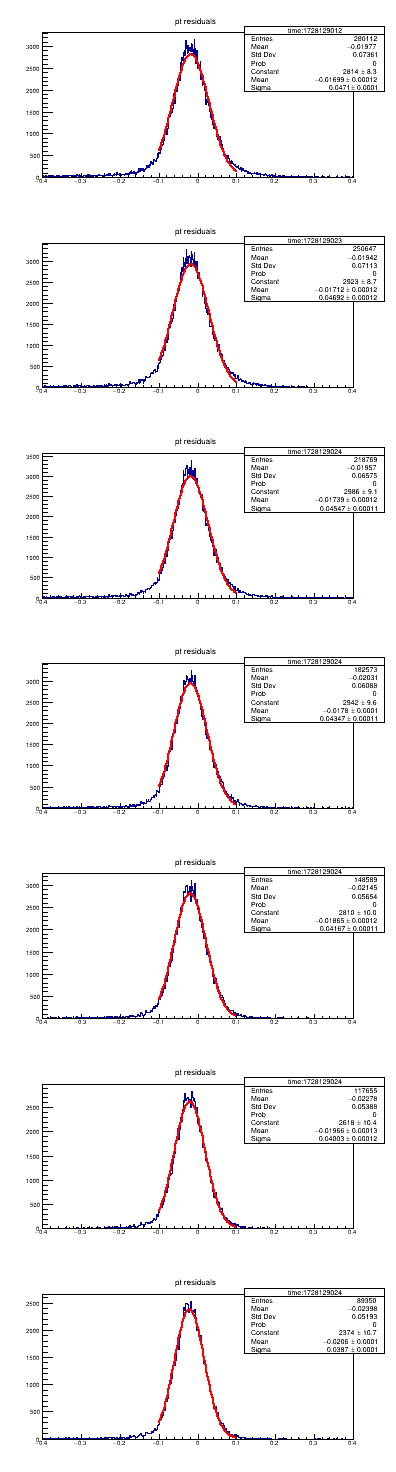

In [38]:
c = ROOT.TCanvas("canvas_name", "Canvas", 400, 1500)
ROOT.gStyle.SetOptFit(1011)
c.Divide(1,len(hists))
for i, hist in enumerate(hists):
    c.cd(i+1)
    hist.Draw()
c.Draw()

NameError: name 'all_hists' is not defined

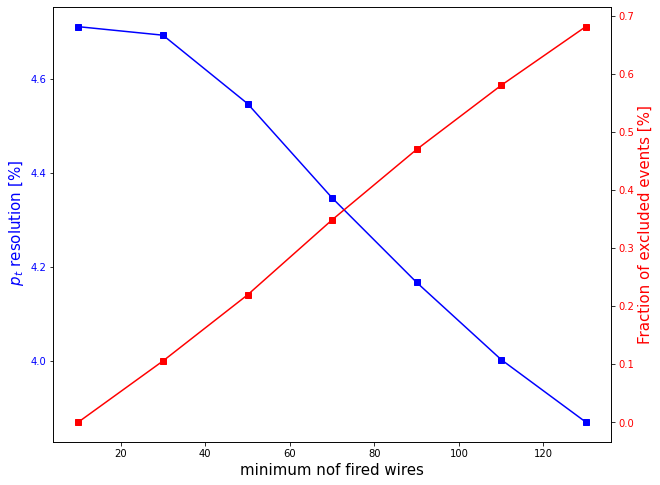

In [39]:
plotter = MultiPlotter(nrows = 1, ncols = 1, figsize = (10, 8))

ax = plotter.axes[plotter.current_ax]
# fig,ax = plt.subplots(figsize=(10,8))
ax.plot(bin_center, resolution, 's-', color='blue')
ax.set_xlabel(r"minimum nof fired wires", fontsize=15)
ax.set_ylabel(r" $p_t$ resolution [%]", fontsize=15, color='blue')
ax.tick_params(axis='y', labelcolor='blue')

x2 = ax.twinx()

# Plotta l'efficienza sull'asse destro
x2.plot(bin_center, 1-np.array(efficiency), 's-', color='red')  # 's-' per visualizzare quadrati collegati
x2.set_ylabel("Fraction of excluded events [%]", fontsize=15, color='red')
x2.tick_params(axis='y', labelcolor='red')

plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/pt_res_and_efficiency_vs_nof_fired_wires.pdf")

all_hists.append(plotter)

In [12]:
df_manager.DefineSample("enough_wires", "nof_fired_wires >= 70")
df_manager.DefineSample("enough_wires_signal", "nof_fired_wires >= 70 & CCQEonHydrogen == 1")
df_manager.DefineSample("enough_wires_bkg", "nof_fired_wires >= 70 & CCQEonHydrogen == 0")

In [13]:
good_sample = df_manager.GetSample("enough_wires")
good_sample_signal = df_manager.GetSample("enough_wires_signal")
background = df_manager.GetSample("enough_wires_bkg")

In [65]:
len(background.dataframe)

169241

In [66]:
len(good_sample_signal.dataframe)

14797

In [61]:
len(good_sample_signal.dataframe)

14705

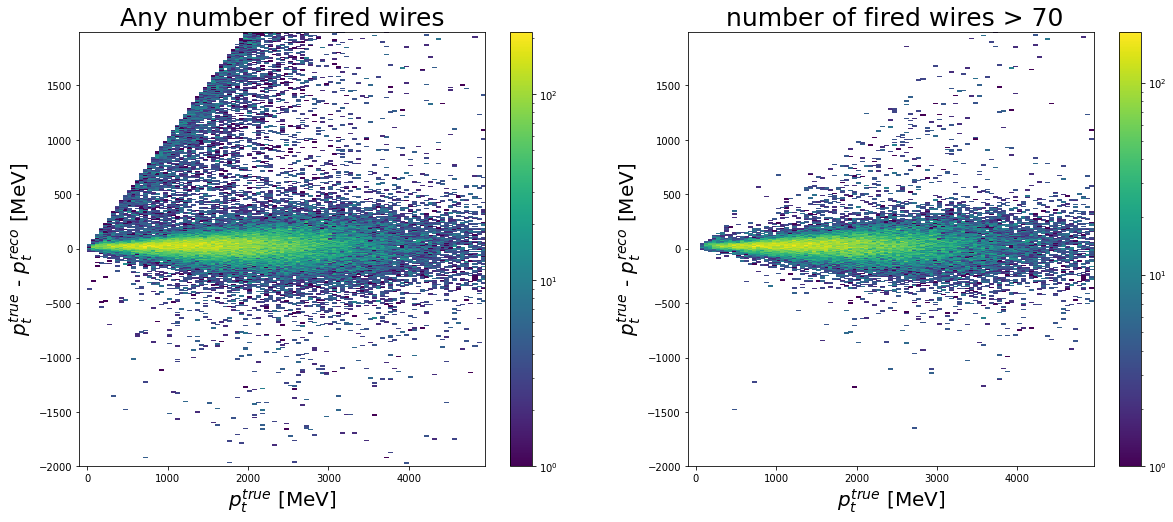

In [43]:
plotter = MultiPlotter(nrows = 1, ncols = 2, figsize = (20, 8))

plotter.plot_hist2d(
    x = df["Antimuon_pt_true"],
    y = df["Antimuon_pt_true"] - df["Antimuon_pt_reco"],
    bins_x = range['pt'],
    bins_y = np.arange(-2000,2000,5),
    xlabel = r"$p_t^{true}$ [MeV]",
    ylabel = r"$p_t^{true}$ - $p_t^{reco}$ [MeV]",
    log_scale = True
)

plotter.axes[plotter.current_ax].set_title("Any number of fired wires", fontsize=25)

plotter.next_plot()

plotter.plot_hist2d(
    x = good_sample.dataframe["Antimuon_pt_true"],
    y = good_sample.dataframe["Antimuon_pt_true"] - good_sample.dataframe["Antimuon_pt_reco"],
    bins_x = range['pt'],
    bins_y = np.arange(-2000,2000,5),
    xlabel = r"$p_t^{true}$ [MeV]",
    ylabel = r"$p_t^{true}$ - $p_t^{reco}$ [MeV]",
    log_scale = True
)

plotter.axes[plotter.current_ax].set_title(" number of fired wires > 70", fontsize=25)

plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/pt_res_vs_pt_true_pre_post_cut.pdf")

all_hists.append(plotter)


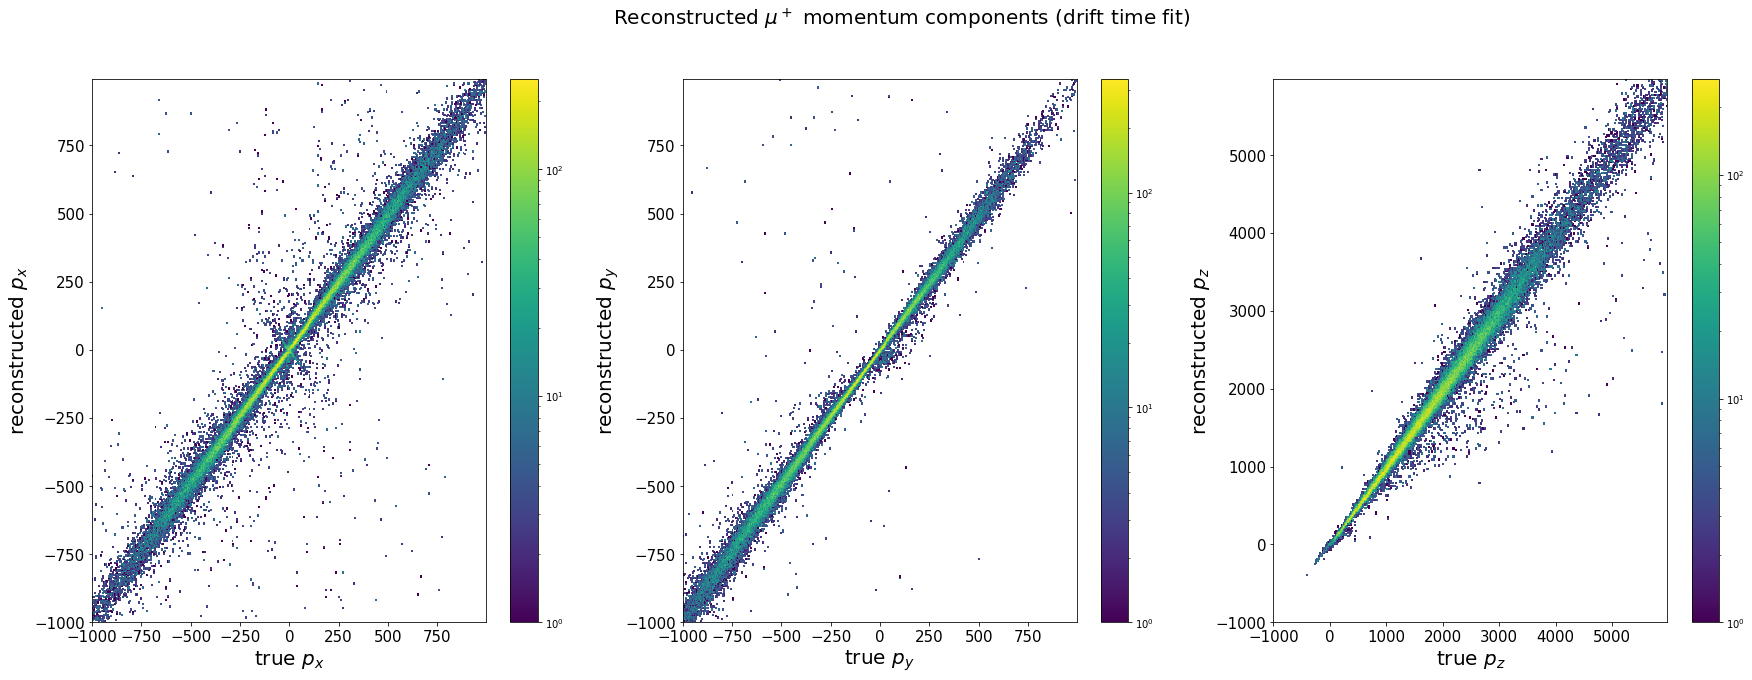

In [44]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=3, figsize=(30, 10), suptitle=r"Reconstructed $\mu^+$ momentum components (drift time fit)")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_p_truefX'],
    y=good_sample.dataframe['Antimuon_p_recofX'],
    bins_x=np.arange(-1000, 1000, 5),
    bins_y=np.arange(-1000, 1000, 5),
    xlabel=r"true $p_x$",
    ylabel=r"reconstructed $p_x$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
plotter.next_plot()


# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_p_truefY'],
    y=good_sample.dataframe['Antimuon_p_recofY'],
    bins_x=np.arange(-1000, 1000, 5),
    bins_y=np.arange(-1000, 1000, 5),
    xlabel=r"true $p_y$",
    ylabel=r"reconstructed $p_y$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
plotter.next_plot()

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_p_truefZ'],
    y=good_sample.dataframe['Antimuon_p_recofZ'],
    bins_x=np.arange(-1000, 6000, 20),
    bins_y=np.arange(-1000, 6000, 20),
    xlabel=r"true $p_z$",
    ylabel=r"reconstructed $p_z$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/resitduals_momentum_components.pdf")

all_hists.append(plotter)

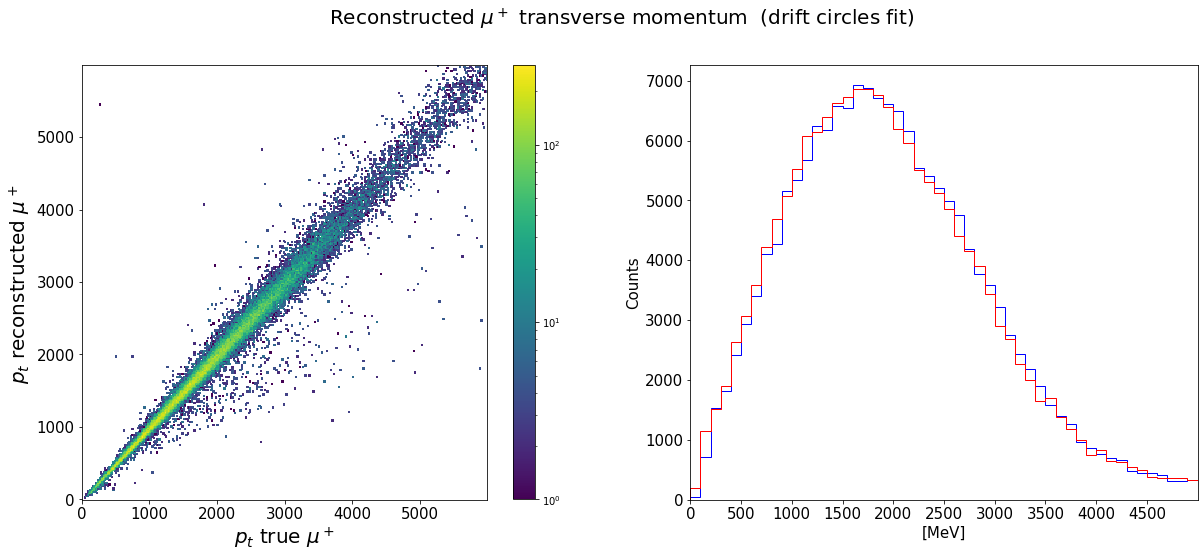

In [45]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\mu^+$ transverse momentum  (drift circles fit)")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_pt_true'],
    y=good_sample.dataframe['Antimuon_pt_reco'],
    bins_x=np.arange(-1, 6000, 20),
    bins_y=np.arange(-1, 6000, 20),
    xlabel=r"$p_t$ true $\mu^+$",
    ylabel=r"$p_t$ reconstructed $\mu^+$ ",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.plot([-1, 6000], [-1, 6000], linestyle='-', color='red')

# Set the title
# plotter.axes[0].set_title(r"Reconstructed $\mu^+$ momentum with drift time fit", fontsize=20)
# plotter.add_legend(labels=["true", "reco"])
plotter.next_plot()

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_pt_true'],
    bins=range['ptot'],
    label='true',
    color='blue'
)

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_pt_reco'],
    bins=range['ptot'],
    label='reco',
    color='red',
    xlabel="[MeV]",
    ylabel="Counts"
)

plotter.set_labels(
    xlabel="[MeV]",
    ylabel="Counts",
    fontsize=15
)

plotter.set_limits(
    xlim = (0,5000)
)


plotter.axes[plotter.current_ax].set_xticks(np.arange(0,5000,500))
ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/transverse_momentum_true_vs_reco.pdf")
all_hists.append(plotter)

 FCN=1166.63 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.2141e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.94166e+03   9.60279e+00   1.20626e-01   2.15301e-05
   2  Mean        -1.78000e-02   1.17389e-04   1.94189e-06   2.93026e-02
   3  Sigma        4.34674e-02   1.11469e-04   1.11658e-05   1.48310e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name
Info in <TCanvas::Print>: pdf file /storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/resitduals_transverse_momentum.pdf has been created


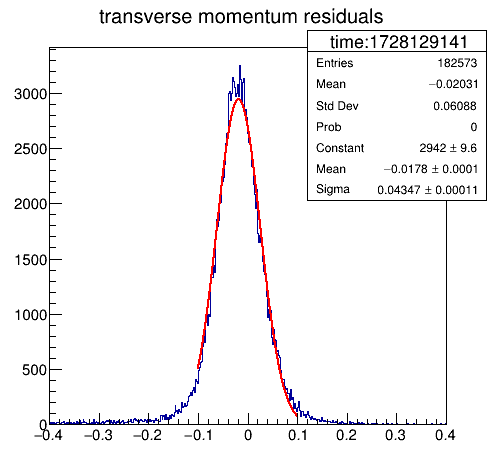

In [46]:
hist_ptot = tool.FillTH1D(iterable = good_sample.dataframe['Antimuon_pt_residual'].dropna().values, 
                          histogram_name = "", 
                          title = "transverse momentum residuals", 
                          nbins = int(np.sqrt(len(good_sample.dataframe))),
                          #  nbins = 30,
                          x_min = -0.4, 
                          x_max = 0.4)

hist_ptot_, mean, sigma, mean_err, sigma_err = tool.FitTH1D_w_gauss(hist = hist_ptot, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))

ROOT.gStyle.SetOptFit(1011)
c = ROOT.TCanvas("canvas_name", "Canvas", 500, 500)
hist_ptot.Draw()
c.Draw()

c.SaveAs("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/resitduals_transverse_momentum.pdf")

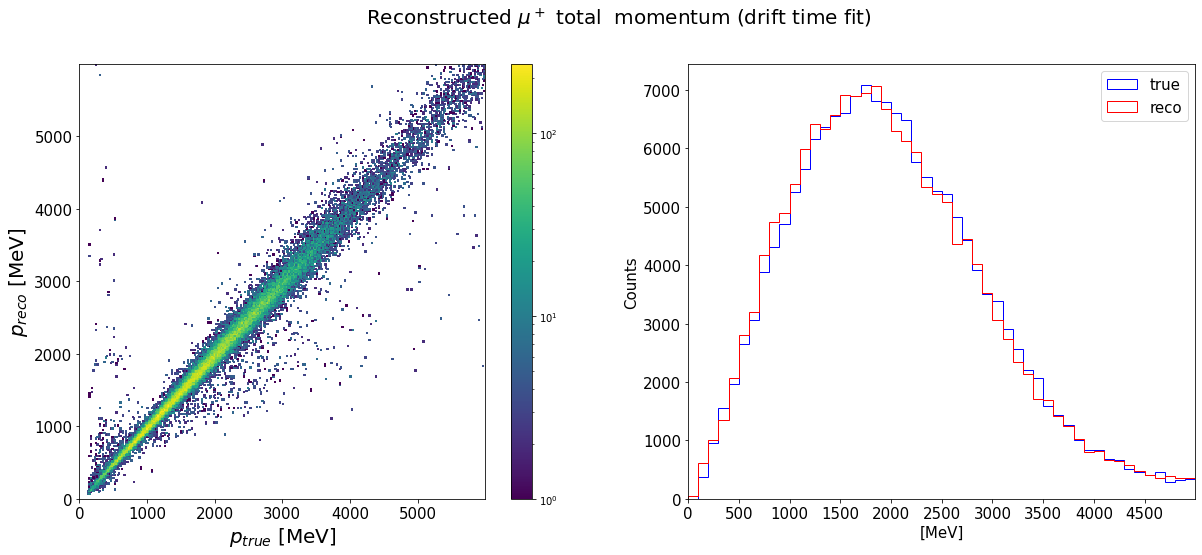

In [47]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\mu^+$ total  momentum (drift time fit)")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_ptot_true'],
    y=good_sample.dataframe['Antimuon_ptot_reco'],
    bins_x=np.arange(-1, 6000, 20),
    bins_y=np.arange(-1, 6000, 20),
    xlabel=r"$p_{true}$ [MeV]",
    ylabel=r"$p_{reco}$ [MeV]",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
plotter.next_plot()

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_ptot_true'],
    bins=np.arange(0,8000, 100),
    label='true',
    color='blue'
)

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_ptot_reco'],
    bins=np.arange(0,8000, 100),
    label='reco',
    color='red',
    xlabel="[MeV]",
    ylabel="Counts"
)

plotter.set_labels(
    xlabel="[MeV]",
    ylabel="Counts",
    fontsize=15
)

plotter.set_limits(
    xlim = (0,5000)
)

plotter.axes[plotter.current_ax].set_xticks(np.arange(0,5000,500))
ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)
plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/total_momentum_true_vs_reco.pdf")
all_hists.append(plotter)

In [48]:
df.columns

Index(['CCQEonHydrogen', 'nof_fired_wires', 'edep_event_index',
       'IncomingNeutrinoP4_x', 'IncomingNeutrinoP4_y', 'IncomingNeutrinoP4_z',
       'IncomingNeutrinoP4_t', 'NuDirectionfX', 'NuDirectionfY',
       'NuDirectionfZ', 'Antimuon_pt_true', 'Antimuon_pt_reco',
       'Antimuon_p_truefX', 'Antimuon_p_truefY', 'Antimuon_p_truefZ',
       'Antimuon_p_recofX', 'Antimuon_p_recofY', 'Antimuon_p_recofZ',
       'Antimuon_ptot_true', 'Antimuon_ptot_reco', 'Antimuon_dip_true',
       'Antimuon_dip_reco', 'Antimuon_Phi0_true', 'Antimuon_Phi0_reco',
       'Antimuon_x0_truefX', 'Antimuon_x0_truefY', 'Antimuon_x0_truefZ',
       'Antimuon_x0_recofX', 'Antimuon_x0_recofY', 'Antimuon_x0_recofZ',
       'chi2_fit_zy', 'chi2_fit_xz', 'Neutrino_reconstructed_P4_GeV_x',
       'Neutrino_reconstructed_P4_GeV_y', 'Neutrino_reconstructed_P4_GeV_z',
       'Neutrino_reconstructed_P4_GeV_t', 'PredictedNeutron_P3_GeVfX',
       'PredictedNeutron_P3_GeVfY', 'PredictedNeutron_P3_GeVfZ',
       'Final

In [18]:
good_sample_signal.dataframe['PredictedNeutron_E_kin'] = np.sqrt(good_sample_signal.dataframe['PredictedNeutron_P3_GeVfX'] * good_sample_signal.dataframe['PredictedNeutron_P3_GeVfX'] + (good_sample_signal.dataframe['PredictedNeutron_P3_GeVfY'] * good_sample_signal.dataframe['PredictedNeutron_P3_GeVfY']) + (good_sample_signal.dataframe['PredictedNeutron_P3_GeVfZ'] * good_sample_signal.dataframe['PredictedNeutron_P3_GeVfZ']) + 0.939565 * 0.939565) - 0.939565

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
good_sample_signal.dataframe.columns

Index(['index', 'nof_fired_wires', 'CCQEonHydrogen', 'digit_file_input',
       'Antimuon_pt_true', 'Antimuon_pt_reco', 'Antimuon_p_truefX',
       'Antimuon_p_truefY', 'Antimuon_p_truefZ', 'Antimuon_p_recofX',
       'Antimuon_p_recofY', 'Antimuon_p_recofZ', 'Antimuon_ptot_true',
       'Antimuon_ptot_reco', 'Antimuon_dip_true', 'Antimuon_dip_reco',
       'Antimuon_Phi0_true', 'Antimuon_Phi0_reco', 'Antimuon_x0_truefX',
       'Antimuon_x0_truefY', 'Antimuon_x0_truefZ', 'Antimuon_x0_recofX',
       'Antimuon_x0_recofY', 'Antimuon_x0_recofZ', 'chi2_fit_zy',
       'chi2_fit_xz', 'IncomingNeutrinoP4_x', 'IncomingNeutrinoP4_y',
       'IncomingNeutrinoP4_z', 'IncomingNeutrinoP4_t',
       'Neutrino_reconstructed_P4_GeV_x', 'Neutrino_reconstructed_P4_GeV_y',
       'Neutrino_reconstructed_P4_GeV_z', 'Neutrino_reconstructed_P4_GeV_t',
       'PredictedNeutron_P3_GeVfX', 'PredictedNeutron_P3_GeVfY',
       'PredictedNeutron_P3_GeVfZ', 'FinalStateHadronicSystemTotal4Momentum_x',
       'Fin

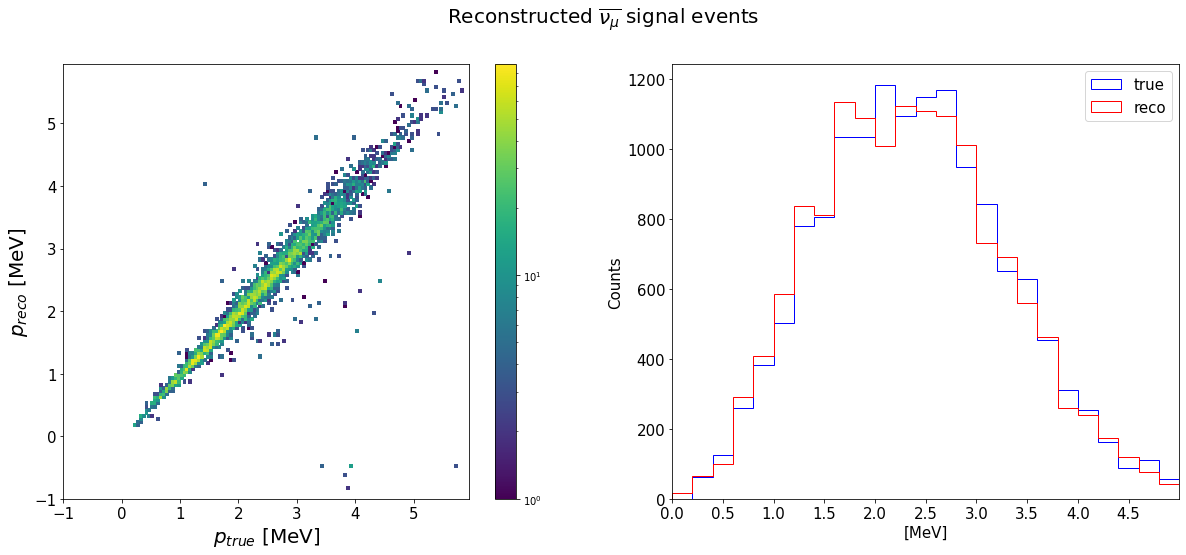

In [49]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\overline{\nu_\mu}$ signal events")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample_signal.dataframe['IncomingNeutrinoP4_t'],
    y=good_sample_signal.dataframe['Neutrino_reconstructed_P4_GeV_t'],
    bins_x=np.arange(-1, 6, 0.05),
    bins_y=np.arange(-1, 6, 0.05),
    xlabel=r"$p_{true}$ [MeV]",
    ylabel=r"$p_{reco}$ [MeV]",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
plotter.next_plot()

plotter.plot_hist(
    data=good_sample_signal.dataframe.dropna()['IncomingNeutrinoP4_t'],
    bins=np.arange(-1, 6, 0.2),
    label='true',
    color='blue'
)

plotter.plot_hist(
    data=good_sample_signal.dataframe.dropna()['Neutrino_reconstructed_P4_GeV_t'],
    bins=np.arange(-1, 6, 0.2),
    label='reco',
    color='red',
    xlabel="[MeV]",
    ylabel="Counts"
)

plotter.set_labels(
    xlabel="[MeV]",
    ylabel="Counts",
    fontsize=15
)

plotter.set_limits(
    xlim = (0,5)
)

plotter.axes[plotter.current_ax].set_xticks(np.arange(0,5,0.5))
ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)
# plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/total_momentum_true_vs_reco.pdf")
# all_hists.append(plotter)

In [53]:
good_sample_signal.dataframe['PredictedNeutron_E_GeV']

FileName
events-in-SANDtracker.200.gtrac.root:gRooTracker:25     1.353813
events-in-SANDtracker.200.gtrac.root:gRooTracker:69     1.005769
events-in-SANDtracker.200.gtrac.root:gRooTracker:88     1.107477
events-in-SANDtracker.200.gtrac.root:gRooTracker:159    1.077278
events-in-SANDtracker.200.gtrac.root:gRooTracker:213    0.964549
                                                          ...   
events-in-SANDtracker.599.gtrac.root:gRooTracker:746    1.202690
events-in-SANDtracker.599.gtrac.root:gRooTracker:761    0.961281
events-in-SANDtracker.599.gtrac.root:gRooTracker:893    0.983615
events-in-SANDtracker.599.gtrac.root:gRooTracker:921    1.167336
events-in-SANDtracker.599.gtrac.root:gRooTracker:955    0.968319
Name: PredictedNeutron_E_GeV, Length: 14705, dtype: float64

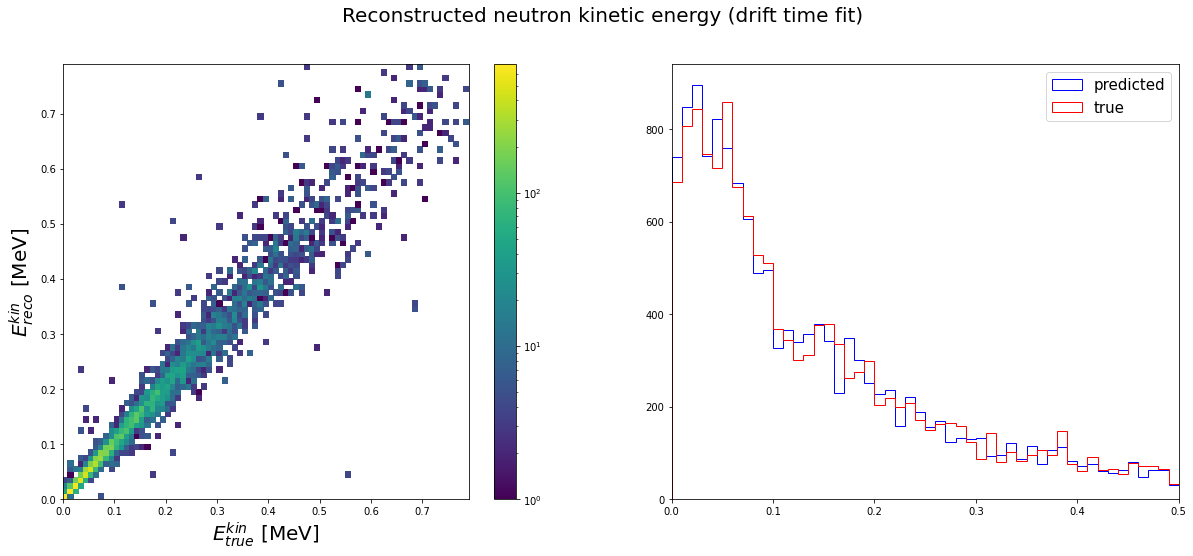

In [59]:
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed neutron kinetic energy (drift time fit)")

plotter.plot_hist2d(
    x=good_sample_signal.dataframe['PredictedNeutron_E_GeV'] - 0.939,
    y=good_sample_signal.dataframe['FinalStateHadronicSystemTotal4Momentum_t']- 0.939,
    bins_x=np.arange(0, 0.8, 0.01),
    bins_y=np.arange(0, 0.8, 0.01),
    xlabel=r"$E^{kin}_{true}$ [MeV]",
    ylabel=r"$E^{kin}_{reco}$ [MeV]",
    log_scale=True
)

plotter.next_plot()

plotter.plot_hist(
    data=good_sample_signal.dataframe.dropna()['PredictedNeutron_E_GeV']- 0.939,
    bins=np.arange(0, 0.8, 0.01),
    label='predicted',
    color='blue',
    xlim=(0,0.5)
)

plotter.plot_hist(
    data=good_sample_signal.dataframe.dropna()['FinalStateHadronicSystemTotal4Momentum_t'] - 0.939,
    bins=np.arange(0, 0.8, 0.01),
    label='true',
    color='red'
)

plotter.axes[plotter.current_ax].legend(fontsize=15)

to calculate true neutron direction:
Antimuon_p_truefX Antimuon_p_truefY Antimuon_p_truefZ
FinalStateHadronicSystemTotal4Momentum_x FinalStateHadronicSystemTotal4Momentum_y FinalStateHadronicSystemTotal4Momentum_z

In [17]:
def angle(v1, v2):
    mag_v1 = np.linalg.norm(v1)
    mag_v2 = np.linalg.norm(v2)
    ptot2 = mag_v1**2 * mag_v2**2

    if ptot2 <= 0:
        return 0.0
    else:
        dot_product = np.dot(v1, v2)
        arg = dot_product / np.sqrt(ptot2)

        # Limitare il valore di arg a [-1.0, 1.0] per evitare errori di precisione
        arg = np.clip(arg, -1.0, 1.0)

        return np.arccos(arg)

def calculate_angle(row):
    v1 = np.array([row['Antimuon_p_truefX'], row['Antimuon_p_truefY'], row['Antimuon_p_truefZ']])
    v2 = np.array([row['FinalStateHadronicSystemTotal4Momentum_x'], 
                   row['FinalStateHadronicSystemTotal4Momentum_y'], 
                   row['FinalStateHadronicSystemTotal4Momentum_z']])
    return angle(v1, v2)

In [18]:
good_sample_signal.dataframe["Neutron_Angle"] = good_sample_signal.dataframe.apply(calculate_angle, axis=1)
background.dataframe["Neutron_Angle"] = background.dataframe.apply(calculate_angle, axis=1)

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
good_sample_signal.dataframe.columns

Index(['CCQEonHydrogen', 'nof_fired_wires', 'edep_event_index',
       'IncomingNeutrinoP4_x', 'IncomingNeutrinoP4_y', 'IncomingNeutrinoP4_z',
       'IncomingNeutrinoP4_t', 'NuDirectionfX', 'NuDirectionfY',
       'NuDirectionfZ', 'Antimuon_pt_true', 'Antimuon_pt_reco',
       'Antimuon_p_truefX', 'Antimuon_p_truefY', 'Antimuon_p_truefZ',
       'Antimuon_p_recofX', 'Antimuon_p_recofY', 'Antimuon_p_recofZ',
       'Antimuon_ptot_true', 'Antimuon_ptot_reco', 'Antimuon_dip_true',
       'Antimuon_dip_reco', 'Antimuon_Phi0_true', 'Antimuon_Phi0_reco',
       'Antimuon_x0_truefX', 'Antimuon_x0_truefY', 'Antimuon_x0_truefZ',
       'Antimuon_x0_recofX', 'Antimuon_x0_recofY', 'Antimuon_x0_recofZ',
       'chi2_fit_zy', 'chi2_fit_xz', 'Neutrino_reconstructed_P4_GeV_x',
       'Neutrino_reconstructed_P4_GeV_y', 'Neutrino_reconstructed_P4_GeV_z',
       'Neutrino_reconstructed_P4_GeV_t', 'PredictedNeutron_P3_GeVfX',
       'PredictedNeutron_P3_GeVfY', 'PredictedNeutron_P3_GeVfZ',
       'Final

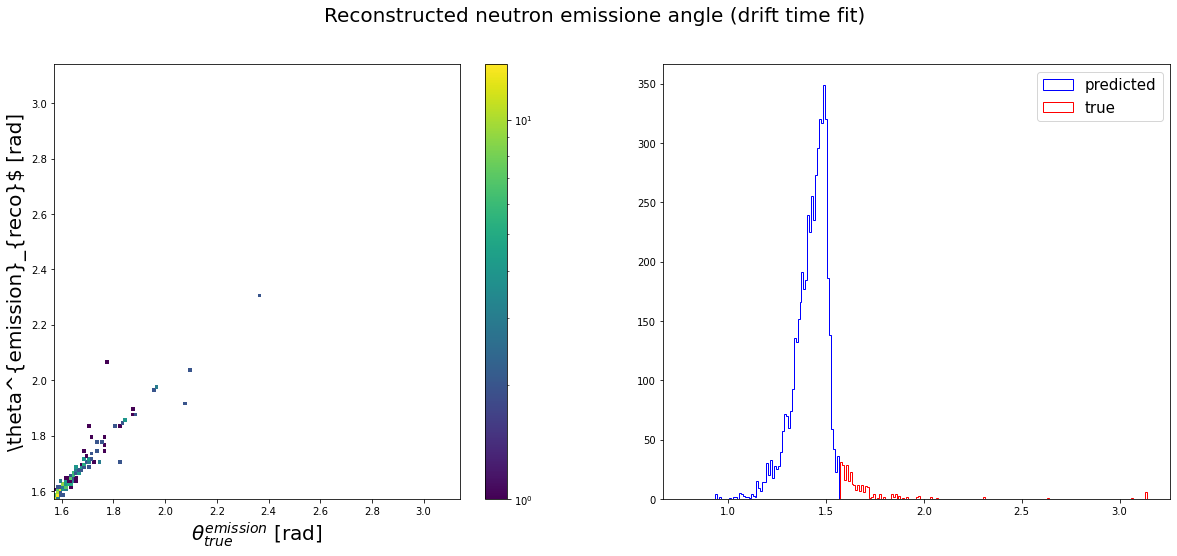

In [19]:
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed neutron emissione angle (drift time fit)")

plotter.plot_hist2d(
    x=good_sample_signal.dataframe["Neutron_Angle"],
    y=good_sample_signal.dataframe["PredictedNeutron_Angle"],
    bins_x=np.arange(np.pi/2,np.pi, 0.01),
    bins_y=np.arange(np.pi/2,np.pi, 0.01),
    xlabel=r"$\theta^{emission}_{true}$ [rad]",
    ylabel=r"\theta^{emission}_{reco}$ [rad]",
    log_scale=True
)

plotter.next_plot()

plotter.plot_hist(
    data=good_sample_signal.dataframe["Neutron_Angle"],
    bins=np.arange(np.pi/4,np.pi/2, 0.01),
    label='predicted',
    color='blue',
    # xlim=(0,0.5)
)

plotter.plot_hist(
    data=good_sample_signal.dataframe["PredictedNeutron_Angle"],
    bins=np.arange(np.pi/2,np.pi, 0.01),
    label='true',
    color='red'
)

plotter.axes[plotter.current_ax].legend(fontsize=15)

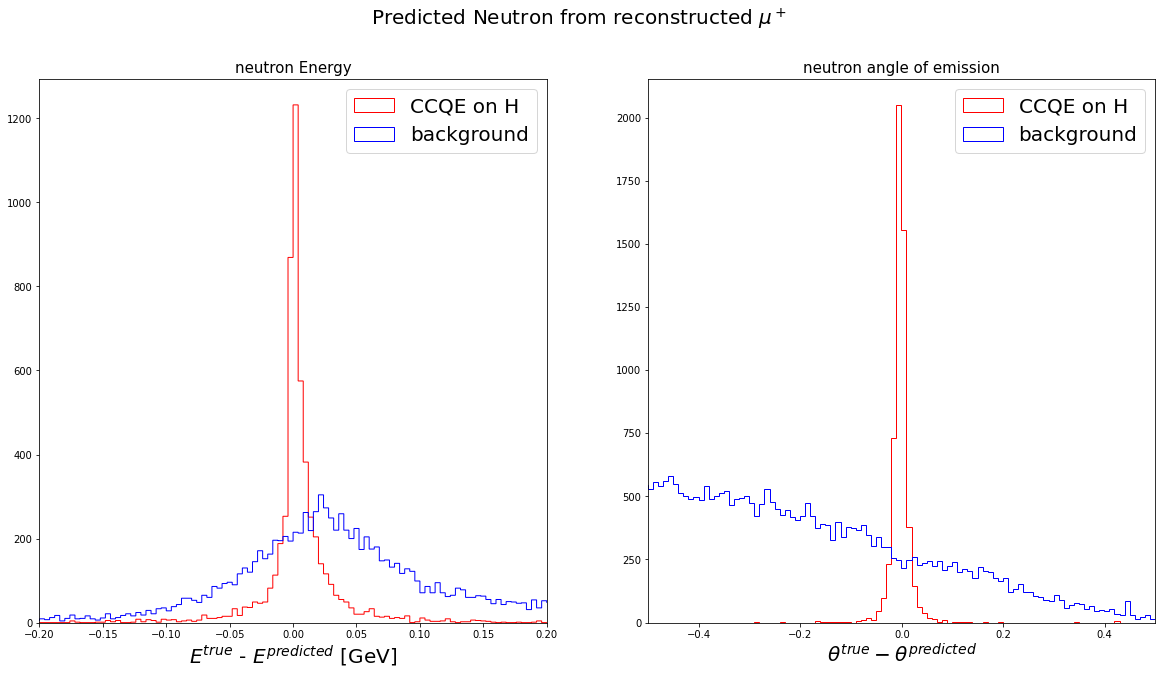

In [21]:
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 10), suptitle=r"Predicted Neutron from reconstructed $\mu^+$")

predicted_neutron_E_signal = good_sample_signal.dataframe.dropna()['PredictedNeutron_E_GeV']
true_neutron_E_signal = good_sample_signal.dataframe.dropna()['FinalStateHadronicSystemTotal4Momentum_t']

predicted_neutron_E_bkg = background.dataframe.dropna()['PredictedNeutron_E_GeV']
true_neutron_E_bkg = background.dataframe.dropna()['FinalStateHadronicSystemTotal4Momentum_t']
####
predicted_neutron_angle_signal = good_sample_signal.dataframe.dropna()['PredictedNeutron_Angle']
true_neutron_angle_single_signal = good_sample_signal.dataframe.dropna()['Neutron_Angle']

predicted_neutron_angle_bkg = background.dataframe.dropna()['PredictedNeutron_Angle']
true_neutron_angle_single_bkg = background.dataframe.dropna()['Neutron_Angle']

plotter.plot_hist(
    data = true_neutron_E_signal - predicted_neutron_E_signal,
    bins=np.arange(-2, 2, 0.004),
    xlabel=r"$E_{}^{true}$ - $E_{}^{predicted}$ [GeV]",
    color='red',
    label='CCQE on H'
)

plotter.plot_hist(
    data = true_neutron_E_bkg - predicted_neutron_E_bkg,
    bins=np.arange(-2, 2, 0.004),
    label='background'
)

plotter.axes[plotter.current_ax].legend(fontsize=20)
plotter.axes[plotter.current_ax].set_xlim((-0.2,0.2))
plotter.axes[plotter.current_ax].set_title(r"neutron Energy", fontsize=15)

plotter.next_plot()

plotter.plot_hist(
    data = true_neutron_angle_single_signal - predicted_neutron_angle_signal,
    bins = np.arange(-np.pi/2, np.pi/2, 0.01),
    xlabel = r"$\theta^{true} - \theta^{predicted}$",
    color = 'red',
    label = 'CCQE on H'
)

plotter.plot_hist(
    data = true_neutron_angle_single_bkg - predicted_neutron_angle_bkg,
    bins = np.arange(-np.pi/2, np.pi/2, 0.01),
    xlabel = r"$\theta^{true} - \theta^{predicted}$",
    color = 'blue',
    label = 'background'
)

plotter.axes[plotter.current_ax].legend(fontsize=20)
plotter.axes[plotter.current_ax].set_xlim((-0.5,0.5))
plotter.axes[plotter.current_ax].set_title(r"neutron angle of emission", fontsize=15)

plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/PredictedNeutron_Energy_angle_of_emission.pdf")


In [78]:
predicted_neutron_K_bkg 

FileName
events-in-SANDtracker.200.gtrac.root:gRooTracker:0      0.338495
events-in-SANDtracker.200.gtrac.root:gRooTracker:9      0.024816
events-in-SANDtracker.200.gtrac.root:gRooTracker:12     0.241243
events-in-SANDtracker.200.gtrac.root:gRooTracker:13     0.112610
events-in-SANDtracker.200.gtrac.root:gRooTracker:18     0.242379
                                                          ...   
events-in-SANDtracker.599.gtrac.root:gRooTracker:989    0.350510
events-in-SANDtracker.599.gtrac.root:gRooTracker:991    0.460769
events-in-SANDtracker.599.gtrac.root:gRooTracker:994    0.085213
events-in-SANDtracker.599.gtrac.root:gRooTracker:995    0.034946
events-in-SANDtracker.599.gtrac.root:gRooTracker:998    0.157097
Name: PredictedNeutron_E_GeV, Length: 169241, dtype: float64

In [26]:
good_sample.dataframe.columns

Index(['index', 'nof_fired_wires', 'digit_file_input', 'Antimuon_pt_true',
       'Antimuon_pt_reco', 'Antimuon_p_truefX', 'Antimuon_p_truefY',
       'Antimuon_p_truefZ', 'Antimuon_p_recofX', 'Antimuon_p_recofY',
       'Antimuon_p_recofZ', 'Antimuon_ptot_true', 'Antimuon_ptot_reco',
       'Antimuon_dip_true', 'Antimuon_dip_reco', 'Antimuon_Phi0_true',
       'Antimuon_Phi0_reco', 'Antimuon_x0_truefX', 'Antimuon_x0_truefY',
       'Antimuon_x0_truefZ', 'Antimuon_x0_recofX', 'Antimuon_x0_recofY',
       'Antimuon_x0_recofZ', 'chi2_fit_zy', 'chi2_fit_xz',
       'PredictedNeutron_P3_GeVfX', 'PredictedNeutron_P3_GeVfY',
       'PredictedNeutron_P3_GeVfZ', 'FinalStateHadronicSystemTotal4Momentum_x',
       'FinalStateHadronicSystemTotal4Momentum_y',
       'FinalStateHadronicSystemTotal4Momentum_z',
       'FinalStateHadronicSystemTotal4Momentum_t', 'Antimuon_ptot_residual',
       'Antimuon_pt_residual', 'Antimuon_dip_residual',
       'PredictedNeutron_E_kin'],
      dtype='object')

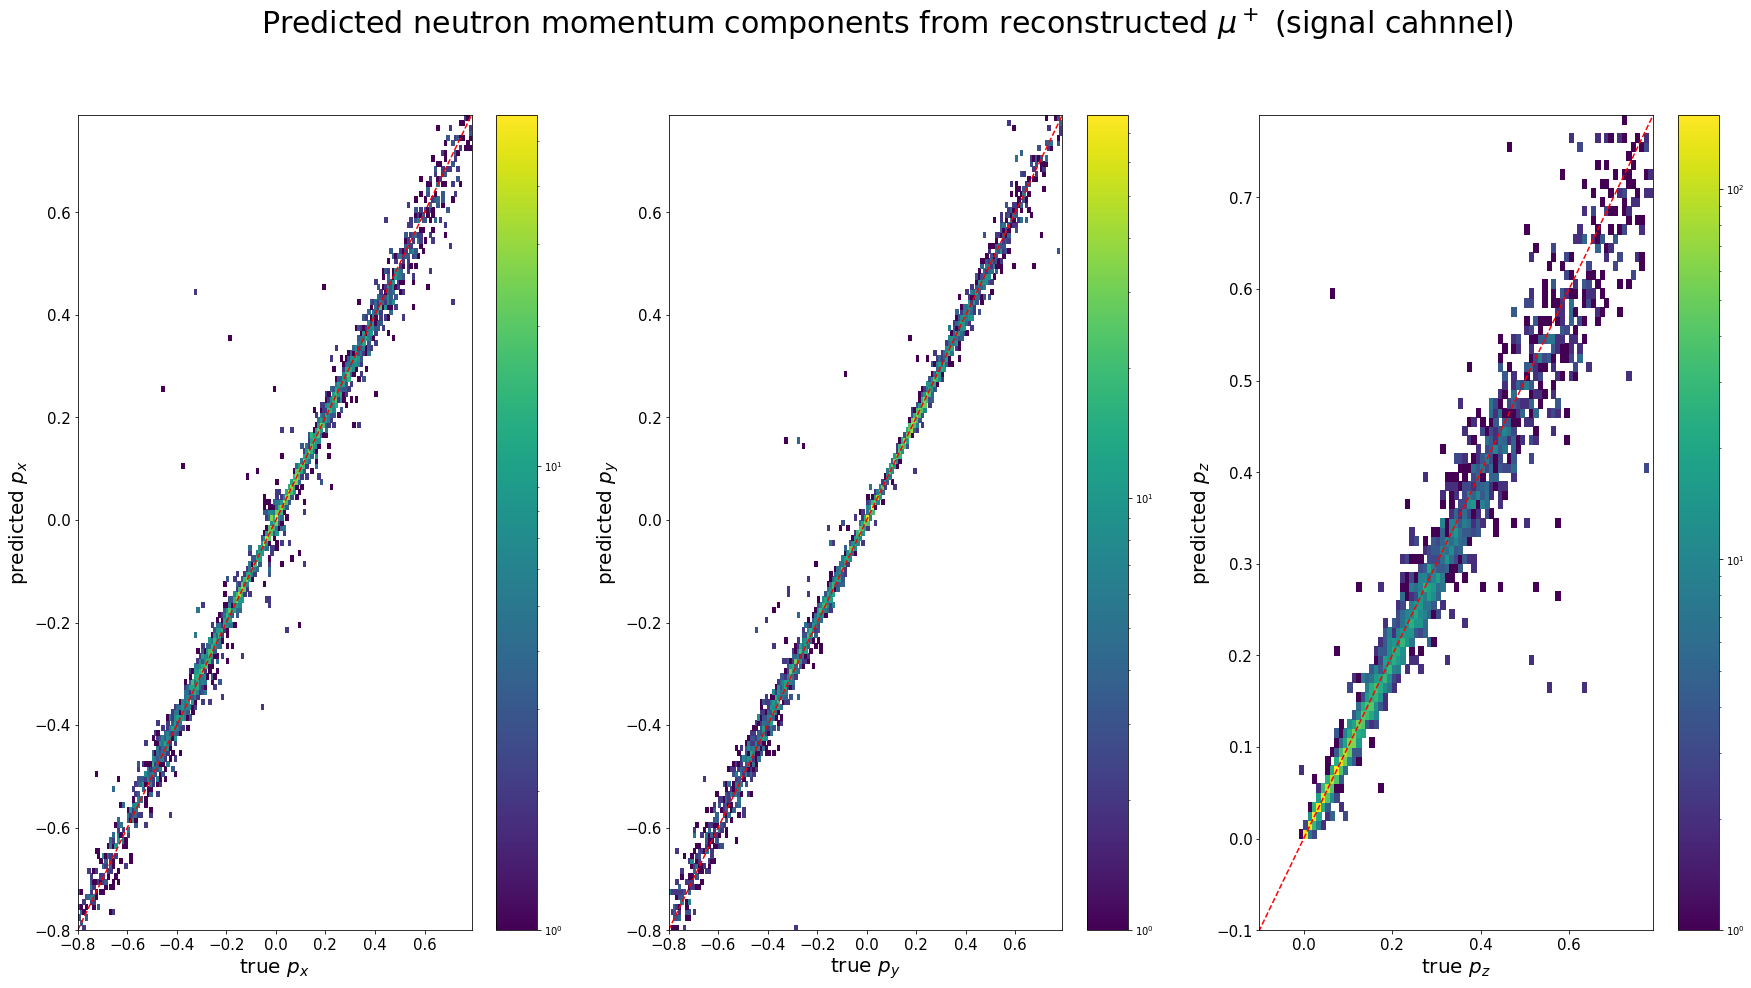

In [22]:
plotter = MultiPlotter(nrows=1, ncols=3, figsize=(30, 15), suptitle=r"Predicted Neutron momentum components from reconstructed $\mu^+$")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample_signal.dataframe['FinalStateHadronicSystemTotal4Momentum_x'],
    y=good_sample_signal.dataframe['PredictedNeutron_P3_GeVfX'],
    bins_x=np.arange(-0.8, 0.8, 0.01),
    bins_y=np.arange(-0.8, 0.8, 0.01),
    xlabel=r"true $p_x$",
    ylabel=r"predicted $p_x$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
plotter.axes[plotter.current_ax].plot([-0.8,0.8],[-0.8,0.8], linestyle='--', color='red')

plotter.next_plot()


# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample_signal.dataframe['FinalStateHadronicSystemTotal4Momentum_y'],
    y=good_sample_signal.dataframe['PredictedNeutron_P3_GeVfY'],
    bins_x=np.arange(-0.8, 0.8, 0.01),
    bins_y=np.arange(-0.8, 0.8, 0.01),
    xlabel=r"true $p_y$",
    ylabel=r"predicted $p_y$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
plotter.axes[plotter.current_ax].plot([-0.8,0.8],[-0.8,0.8], linestyle='--', color='red')

plotter.next_plot()

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample_signal.dataframe['FinalStateHadronicSystemTotal4Momentum_z'],
    y=good_sample_signal.dataframe['PredictedNeutron_P3_GeVfZ'],
    bins_x=np.arange(-0.1, 0.8, 0.01),
    bins_y=np.arange(-0.1, 0.8, 0.01),
    xlabel=r"true $p_z$",
    ylabel=r"predicted $p_z$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
plotter.axes[plotter.current_ax].plot([-0.8,0.8],[-0.8,0.8], linestyle='--', color='red')
plt.suptitle(r"Predicted neutron momentum components from reconstructed $\mu^+$ (signal cahnnel)", fontsize=30)
plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/PredictedNeutron_Momentum.pdf")

# all_hists.append(plotter)

In [99]:
good_sample_signal.dataframe.columns

Index(['index', 'nof_fired_wires', 'CCQEonHydrogen', 'digit_file_input',
       'Antimuon_pt_true', 'Antimuon_pt_reco', 'Antimuon_p_truefX',
       'Antimuon_p_truefY', 'Antimuon_p_truefZ', 'Antimuon_p_recofX',
       'Antimuon_p_recofY', 'Antimuon_p_recofZ', 'Antimuon_ptot_true',
       'Antimuon_ptot_reco', 'Antimuon_dip_true', 'Antimuon_dip_reco',
       'Antimuon_Phi0_true', 'Antimuon_Phi0_reco', 'Antimuon_x0_truefX',
       'Antimuon_x0_truefY', 'Antimuon_x0_truefZ', 'Antimuon_x0_recofX',
       'Antimuon_x0_recofY', 'Antimuon_x0_recofZ', 'chi2_fit_zy',
       'chi2_fit_xz', 'PredictedNeutron_P3_GeVfX', 'PredictedNeutron_P3_GeVfY',
       'PredictedNeutron_P3_GeVfZ', 'FinalStateHadronicSystemTotal4Momentum_x',
       'FinalStateHadronicSystemTotal4Momentum_y',
       'FinalStateHadronicSystemTotal4Momentum_z',
       'FinalStateHadronicSystemTotal4Momentum_t', 'Antimuon_ptot_residual',
       'Antimuon_pt_residual', 'Antimuon_dip_residual',
       'PredictedNeutron_E_kin'],
      

In [ ]:
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed neutrino energy (signal)")

plotter.plot_hist2d(
    x=good_sample_signal.dataframe['PredictedNeutron_E_kin'],
    y=good_sample_signal.dataframe['FinalStateHadronicSystemTotal4Momentum_t'] - 0.939565,
    bins_x=np.arange(0, 0.7, 0.01),
    bins_y=np.arange(0, 0.7, 0.01),
    xlabel=r"$E^{kin}_{true}$ [MeV]",
    ylabel=r"$E^{kin}_{reco}$ [MeV]",
    log_scale=True
)

plotter.next_plot()

plotter.plot_hist(
    data=good_sample_signal.dataframe.dropna()['PredictedNeutron_E_kin'],
    bins=np.arange(0, 0.8, 0.02),
    label='predicted',
    color='blue',
    xlim=(0,0.5)
)

plotter.plot_hist(
    data=good_sample_signal.dataframe.dropna()['FinalStateHadronicSystemTotal4Momentum_t'] - 0.939565,
    bins=np.arange(0, 0.8, 0.02),
    label='true',
    color='red'
)

plotter.axes[plotter.current_ax].legend(fontsize=15)

 FCN=1166.63 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.2141e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.94166e+03   9.60279e+00   1.20626e-01   2.15301e-05
   2  Mean        -1.78000e-02   1.17389e-04   1.94189e-06   2.93026e-02
   3  Sigma        4.34674e-02   1.11469e-04   1.11658e-05   1.48310e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name
Info in <TCanvas::Print>: pdf file /storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/resitduals_pt_momentum.pdf has been created


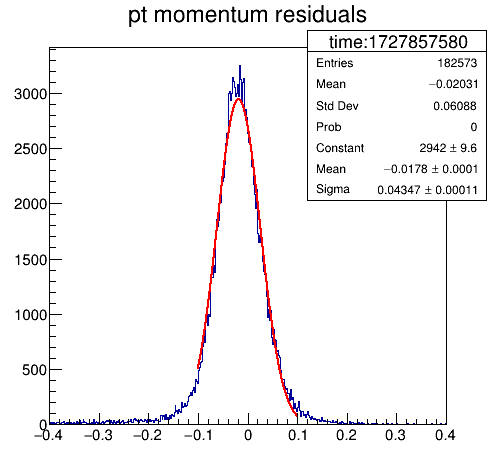

In [43]:
hist_pt = tool.FillTH1D(iterable = good_sample.dataframe['Antimuon_pt_residual'].dropna().values, 
                          histogram_name = "", 
                          title = "pt momentum residuals", 
                          nbins = int(np.sqrt(len(good_sample.dataframe))),
                          #  nbins = 30,
                          x_min = -0.4, 
                          x_max = 0.4)

hist_pt_, mean, sigma, mean_err, sigma_err = tool.FitTH1D_w_gauss(hist = hist_pt, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))

# ROOT.gStyle.SetOptFit(0)
c = ROOT.TCanvas("canvas_name", "Canvas", 500, 500)
hist_pt.Draw()
c.Draw()

c.SaveAs("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/resitduals_pt_momentum.pdf")

In [25]:
# centers, widths = equally_split_bins(df['pt_true'].values, nof_bins=10)
bin_edges  = np.array([0, 1, 2, 3, 5, 8])*1e3
centers = (bin_edges[1:]+bin_edges[:-1])/2
widths  = (bin_edges[1:]-bin_edges[:-1])

resolutions, hists, errors = [], [], []

df_cut = good_sample.dataframe
for pt, width in zip(centers, widths):
    # select all events in a give range of pt
    print(pt)
    df_inrange = df_cut[abs(df_cut['Antimuon_pt_true'] - pt) <= width/2]
    hist = tool.FillTH1D(iterable = df_inrange['Antimuon_pt_residual'].values, 
                         histogram_name = "", 
                         title = "", 
                         nbins = int(np.sqrt(len(df_inrange))),
                        #  nbins = 30,
                         x_min = -0.4, 
                         x_max = 0.4)
    hist, mean, sigma, mean_err, sigma_err = tool.FitTH1D_w_gauss(hist = hist, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))
    print(f"energy range [{pt - width/2},{pt + width/2}] : resolution {sigma}")
    hists.append(hist)
    resolutions.append(sigma)
    errors.append(sigma_err)

500.0
energy range [0.0,1000.0] : resolution 0.04936665276980863
1500.0
energy range [1000.0,2000.0] : resolution 0.041518340520210036
2500.0
energy range [2000.0,3000.0] : resolution 0.040869888147192814
4000.0
energy range [3000.0,5000.0] : resolution 0.04050897434274516
6500.0
energy range [5000.0,8000.0] : resolution 0.04036976144763479
 FCN=330.065 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=5.81197e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.92856e+02   8.69542e+00   6.04377e-02  -8.92601e-05
   2  Mean        -4.59011e-02   5.46396e-04   3.59141e-06   6.65433e-01
   3  Sigma        4.93667e-02   4.77732e-04   1.99567e-05   1.47708e-01
 FCN=688.122 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=2.13307e-08    STRATEGY= 1      ERR

Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856427 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856427 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856427 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856427 (Potential memory leak).


In [26]:
errors

[0.00047773169603828464,
 0.00017689895380166784,
 0.00018755204598587538,
 0.00026344097660025573,
 0.0005108424450020535]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


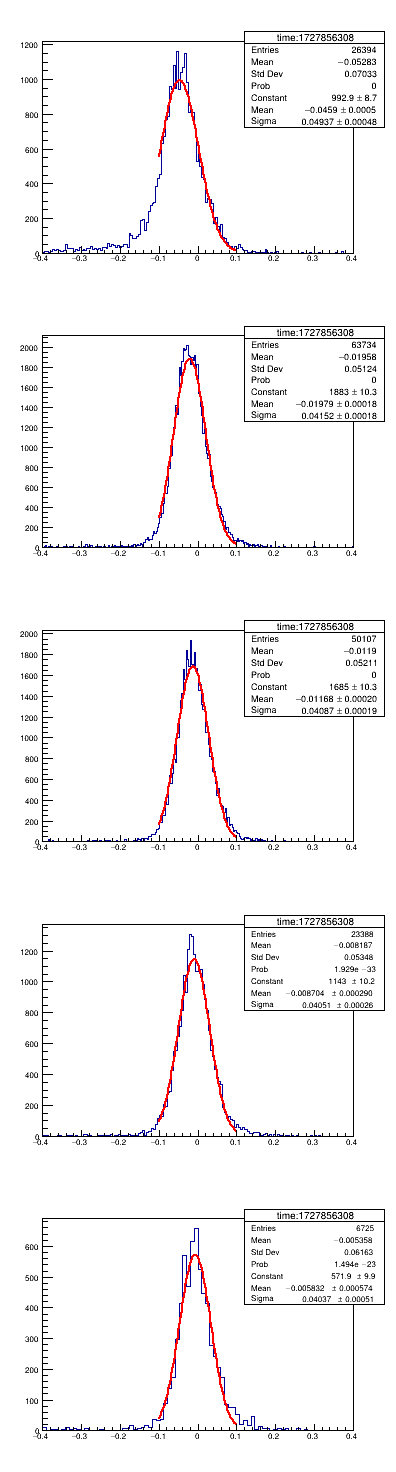

In [21]:
c = ROOT.TCanvas("canvas_name", "Canvas", 400, 1500)
ROOT.gStyle.SetOptFit(1011)
c.Divide(1,len(hists))
for i, hist in enumerate(hists):
    c.cd(i+1)
    hist.Draw()
c.Draw()

In [27]:
sigma_err*1e2

0.05108424450020535

No handles with labels found to put in legend.


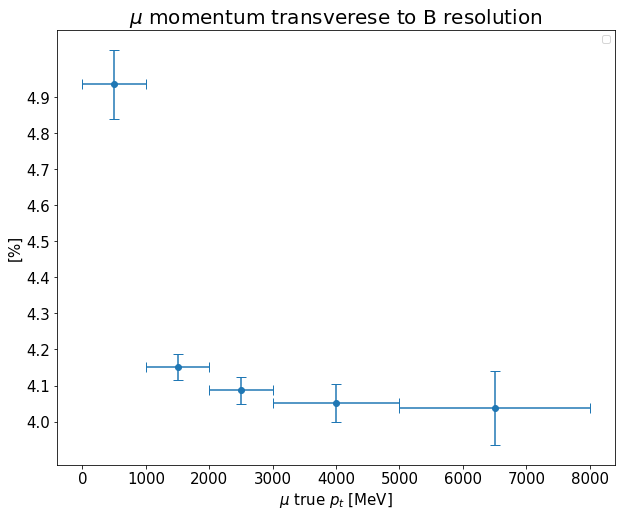

In [28]:
fig,ax = plt.subplots(figsize=(10,8))
ax.errorbar(x=centers, y=np.array(resolutions)*1E2, xerr=np.array(widths)/2 , yerr=np.array(errors)*2E2,fmt ='o',capsize=5)
plt.xlabel(r"$\mu$ true $p_t$ [MeV]", fontsize=15)
plt.ylabel("[%]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(np.arange(4,5,0.1), fontsize=15)
plt.legend()

plt.title(r"$\mu$ momentum transverese to B resolution", fontsize=20)
plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/pt_resolution_vs_pt_true.pdf")

In [31]:
# centers, widths = equally_split_bins(df['pt_true'].values, nof_bins=10)
bin_edges  = np.array([0, 1, 2, 3, 5, 8])*1e3
centers = (bin_edges[1:]+bin_edges[:-1])/2
widths  = (bin_edges[1:]-bin_edges[:-1])
resolutions, hists, errors = [], [], []

# df_cut = df[(df.TMinuitFinalStatus==1)&(df.nof_digits>10)]
df_cut = df
for pt, width in zip(centers, widths):
    # select all events in a give range of pt
    print(pt)
    df_inrange = df_cut[abs(df_cut['Antimuon_ptot_true'] - pt) <= width/2]
    hist = tool.FillTH1D(iterable = df_inrange['Antimuon_ptot_residual'].values, 
                         histogram_name = "", 
                         title = "", 
                         nbins = int(np.sqrt(len(df_inrange))),
                        #  nbins = 30,
                         x_min = -0.4, 
                         x_max = 0.4)
    hist, mean, sigma, mean_err, sigma_err = tool.FitTH1D_w_gauss(hist = hist, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))
    print(f"energy range [{pt - width/2},{pt + width/2}] : resolution {sigma}")
    hists.append(hist)
    resolutions.append(sigma)
    errors.append(sigma_err)

500.0
energy range [0.0,1000.0] : resolution 0.0588615162892912
1500.0
energy range [1000.0,2000.0] : resolution 0.04604005549680199
2500.0
energy range [2000.0,3000.0] : resolution 0.04431726772378712
4000.0
energy range [3000.0,5000.0] : resolution 0.04332966839647698
6500.0
energy range [5000.0,8000.0] : resolution 0.04285438296733591
 FCN=301.211 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=7.99185e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.41848e+02   6.83656e+00   4.44852e-02   2.90195e-05
   2  Mean        -3.76242e-02   6.05748e-04   3.88609e-06   3.48353e-01
   3  Sigma        5.88615e-02   5.82546e-04   2.00380e-05   1.55862e-01
 FCN=1025.12 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=4.52533e-13    STRATEGY= 1      ERROR 

Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856651 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856651 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856651 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856651 (Potential memory leak).


In [ ]:
hist_ptot = tool.FillTH1D(iterable = good_sample.dataframe['Antimuon_ptot_residual'].dropna().values, 
                          histogram_name = "", 
                          title = "total momentum residuals", 
                          nbins = int(np.sqrt(len(good_sample.dataframe))),
                          #  nbins = 30,
                          x_min = -0.4, 
                          x_max = 0.4)

hist_ptot_, mean, sigma, mean_err, sigma_err = tool.FitTH1D_w_gauss(hist = hist_ptot, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))

# ROOT.gStyle.SetOptFit(0)
c = ROOT.TCanvas("canvas_name", "Canvas", 500, 500)
hist_ptot.Draw()
c.Draw()

c.SaveAs("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/resitduals_total_momentum.pdf")

No handles with labels found to put in legend.


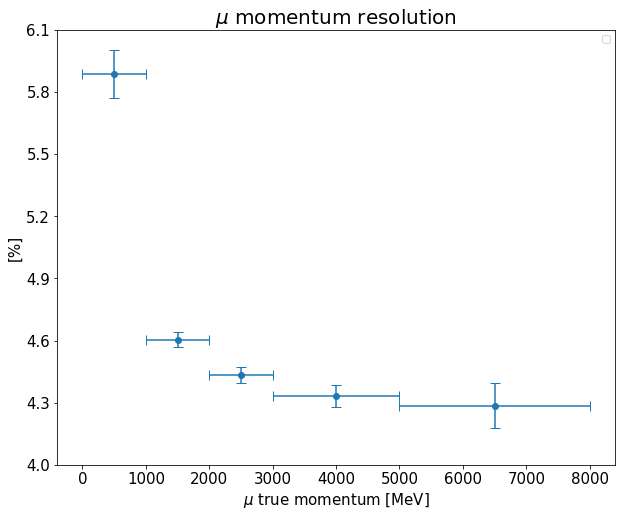

In [34]:
# fig,ax = plt.subplots(figsize=(10,8))
plotter = MultiPlotter(nrows = 1, ncols = 1, figsize = (10, 8))

ax = plotter.axes[plotter.current_ax]

ax.errorbar(x=centers, y=np.array(resolutions)*1E2, xerr=np.array(widths)/2 ,yerr=np.array(errors)*2E2,fmt ='o',capsize=5)
plt.xlabel(r"$\mu$ true momentum [MeV]", fontsize=15)
plt.ylabel("[%]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(np.arange(4,6.2,0.3), fontsize=15)
plt.legend()
plt.title(r"$\mu$ momentum resolution", fontsize=20)

plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/total_momentum_resolution_vs_true_momentum.pdf")

# all_hists.append(plotter)

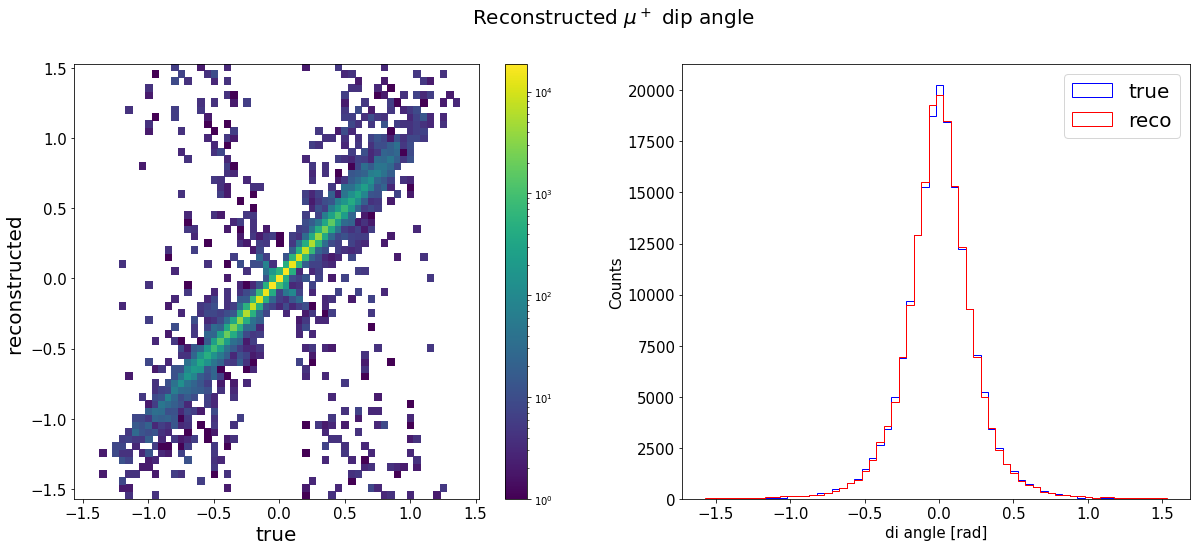

In [274]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\mu^+$ dip angle ")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_dip_true'],
    y=good_sample.dataframe['Antimuon_dip_reco'],
    bins_x=np.arange(-np.pi/2, np.pi/2, 0.05),
    bins_y=np.arange(-np.pi/2, np.pi/2, 0.05),
    xlabel="true",
    ylabel="reconstructed ",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)
plotter.next_plot()

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_dip_true'],
    bins=np.arange(-np.pi/2, np.pi/2, 0.05),
    label='true',
    color='blue'
)

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_dip_reco'],
    bins=np.arange(-np.pi/2, np.pi/2, 0.05),
    label='reco',
    color='red',
    xlabel="[red]",
    ylabel="Counts"
)

plotter.set_labels(
    xlabel="di angle [rad]",
    ylabel="Counts",
    fontsize=15
)

plotter.axes[plotter.current_ax].legend(fontsize=20)
ax = plotter.axes[plotter.current_ax]
ax = plotter.axes[plotter.current_ax]
ax.tick_params(axis='both', which='major', labelsize=15)

plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/dip_true_vs_dip_reco.pdf")

all_hists.append(plotter)

 FCN=3010.3 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=3.42732e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.50116e+03   1.46913e+01   2.75529e-01  -1.26875e-05
   2  Mean         1.93341e-05   9.03693e-06   2.42135e-07  -3.48355e+00
   3  Sigma        2.62992e-03   1.07858e-05   2.79697e-05   6.15744e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name
Info in <TCanvas::Print>: pdf file /storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/dip_angle_residuals.pdf has been created


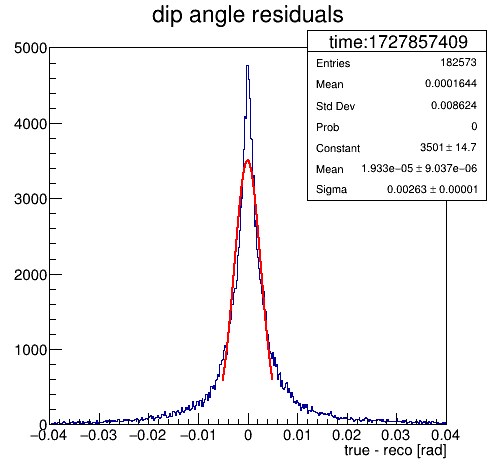

In [40]:
hist_ptot = tool.FillTH1D(iterable = good_sample.dataframe['Antimuon_dip_residual'].dropna().values, 
                          histogram_name = "", 
                          title = "dip angle residuals; true - reco [rad]", 
                          nbins = int(np.sqrt(len(good_sample.dataframe))),
                          x_min = -0.04, 
                          x_max = 0.04)

hist_ptot_, mean, sigma,  mean_err, sigma_err = tool.FitTH1D_w_gauss(hist = hist_ptot, 
                                             gauss_range = (-0.02, 0.02), 
                                             fit_range = (-0.005,0.005))

ROOT.gStyle.SetOptFit(1011)
c = ROOT.TCanvas("canvas_name", "Canvas", 500, 500)
hist_ptot.Draw()
c.Draw()

c.SaveAs("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/dip_angle_residuals.pdf")

In [35]:
# centers, widths = equally_split_bins(df['pt_true'].values, nof_bins=10)
bin_edges  = np.array([-1.5, -0.2, -0.1, 0.1, 0.2, 1.5])
centers = (bin_edges[1:]+bin_edges[:-1])/2
widths  = (bin_edges[1:]-bin_edges[:-1])

resolutions, hists, errors = [], [], []

# df_cut = df[(df.TMinuitFinalStatus==1)&(df.nof_digits>10)]
df_cut = good_sample.dataframe
for dip, width in zip(centers, widths):
    # select all events in a give range of pt
    print(dip)
    df_inrange = df_cut[abs(df_cut['Antimuon_dip_true'] - dip) <= width/2]
    hist = tool.FillTH1D(iterable = df_inrange['Antimuon_dip_residual'].values, 
                         histogram_name = "", 
                         title = "", 
                         nbins = int(np.sqrt(len(df_inrange))),
                        #  nbins = 30,
                         x_min = -0.04, 
                         x_max = 0.04)
    hist, mean, sigma,  mean_err, sigma_err = tool.FitTH1D_w_gauss(hist = hist, 
                                             gauss_range = (-0.02, 0.02), 
                                             fit_range = (-0.01,0.01))
    print(f"energy range [{dip - width/2},{dip + width/2}] : resolution {sigma}")
    hists.append(hist)
    resolutions.append(sigma)
    errors.append(sigma_err)

-0.85
energy range [-1.5,-0.19999999999999996] : resolution 0.005510017735419025
-0.15000000000000002
energy range [-0.2,-0.10000000000000002] : resolution 0.00353180090691004
0.0
energy range [-0.1,0.1] : resolution 0.002636210470701168
0.15000000000000002
energy range [0.10000000000000002,0.2] : resolution 0.0036136176650293566
0.85
energy range [0.19999999999999996,1.5] : resolution 0.005721185884520742
 FCN=353.411 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=6.09165e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.29060e+02   6.81690e+00   4.42450e-02  -2.94951e-07
   2  Mean        -6.77041e-04   5.10949e-05   4.66695e-07   2.10465e+00
   3  Sigma        5.51002e-03   6.15140e-05   2.65770e-05   8.92840e-03
 FCN=1109.09 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70

Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856753 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856753 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856753 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727856753 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


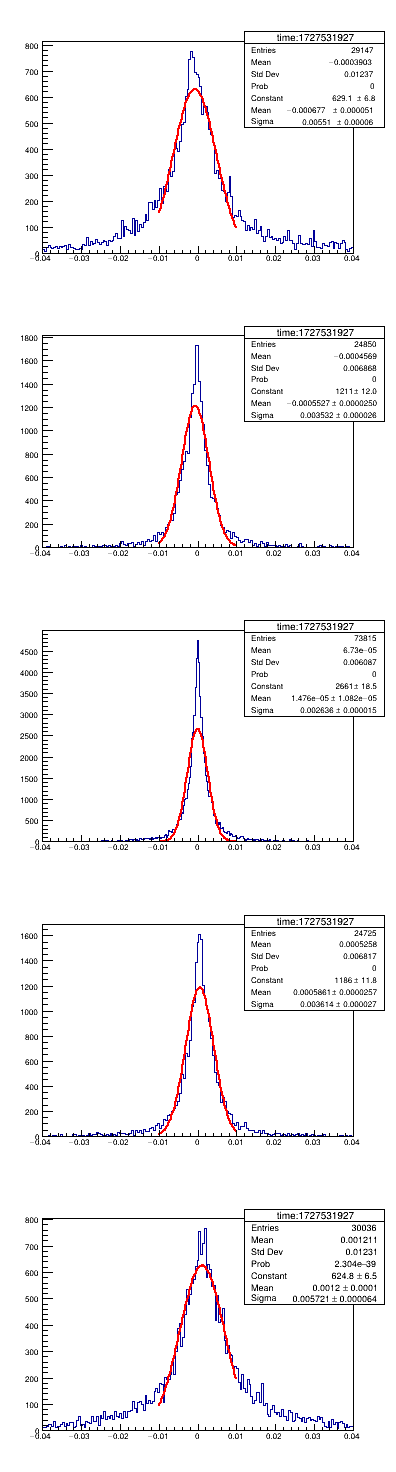

In [278]:
c = ROOT.TCanvas("canvas_name", "Canvas", 400, 1500)
ROOT.gStyle.SetOptFit(1011)
c.Divide(1,len(hists))
for i, hist in enumerate(hists):
    c.cd(i+1)
    hist.Draw()
c.Draw()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


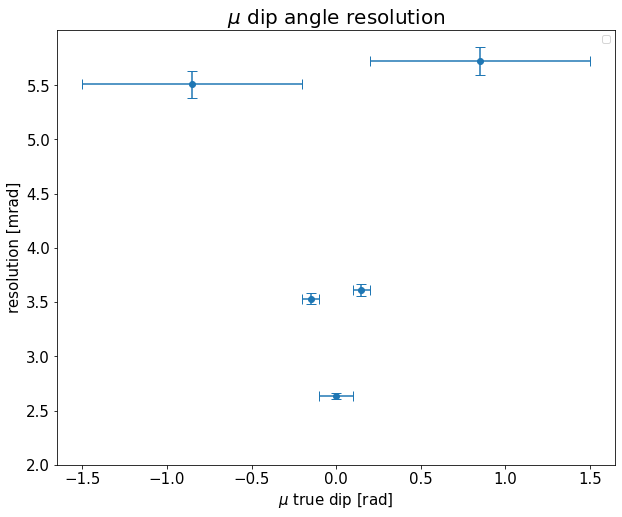

In [37]:
# fig,ax = plt.subplots(figsize=(10,8))
plotter = MultiPlotter(nrows = 1, ncols = 1, figsize = (10, 8))

ax = plotter.axes[plotter.current_ax]

ax.errorbar(x=centers, y=np.array(resolutions)*1e3, xerr=np.array(widths)/2, yerr=np.array(errors)*2e3,fmt ='o',capsize=5)
plt.xlabel(r"$\mu$ true dip [rad]", fontsize=15)
plt.ylabel("resolution [mrad]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(np.arange(2,5.7,0.5), fontsize=15)
# plt.yticks(np.arange(4,6,0.5), fontsize=15)
plt.legend()
plt.title(r"$\mu$ dip angle resolution", fontsize=20)

plt.xticks(fontsize=15)
plt.legend()


plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/Drift_reco/dip_resolution_vs_dip_true.pdf")

# all_hists.append(plotter)

AttributeError: 'Figure' object has no attribute 'fig'

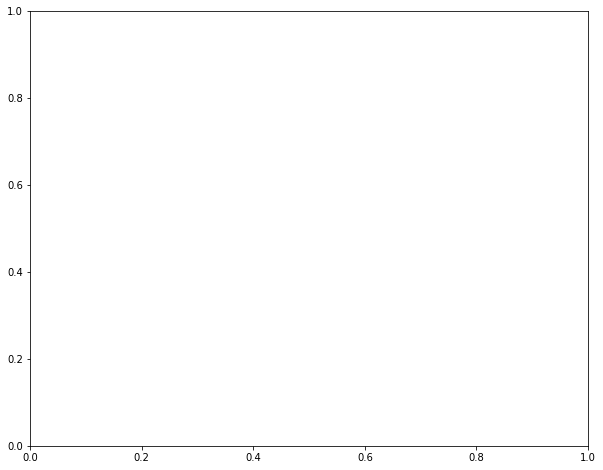

In [166]:
MultiPlotter().save_multiple_figures_to_pdf('/storage/gpfs_data/neutrino/users/gi/sand-physics/scratch/drift_reco.pdf', all_hists)

In [10]:
def Tuple2String(input_column: tuple) -> str:
    """
    Parse input column (tuple) and return a short name.
    
    Example:
    ('PrimariesFirstHitECAL', 'fP', 'fX') -> PrimariesFirstHitECAL_x
    ('PrimariesFirstHitECAL', 'fE', '')   -> PrimariesFirstHitECAL_t
    """
    colName, suffix1, suffix2 = input_column
    if suffix1 == 'fP':
        if suffix2 == 'fX':
            return colName + "_x"
        elif suffix2 == 'fY':
            return colName + "_y"
        elif suffix2 == 'fZ':
            return colName + "_z"
        else:
            return colName
    elif suffix1 == 'fE':
        return colName + "_t"
    else:
        return colName

In [11]:
Tuple2String(('FinalStateHadronicSystemTotal4Momentum', 'fP', 'fX'))

'FinalStateHadronicSystemTotal4Momentum_x'

In [12]:
new_columns = {col: Tuple2String(col) for col in df.columns}

In [13]:
df.columns = ['_'.join(filter(None, col)).strip() for col in df.columns]

In [14]:
df = df.rename(columns=new_columns)

In [15]:
df

FileName  \
edep_file_input                                    edep_event_index                                                      
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 67                events-in-SANDtracker.781.gtrac.root:gRooTrack...   
                                                   132               events-in-SANDtracker.781.gtrac.root:gRooTrack...   
                                                   166               events-in-SANDtracker.781.gtrac.root:gRooTrack...   
                                                   197               events-in-SANDtracker.781.gtrac.root:gRooTrack...   
                                                   256               events-in-SANDtracker.781.gtrac.root:gRooTrack...   
...                                                                                                                ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 993               events-in-SANDtracker.489.gtrac.root:gRooTrack...   
                                                   995               events-in-SANDtracker.489.gtrac.root:gRooTrack...   
                                                   996               events-in-SANDtracker.489.gtrac.root:gRooTrack...   
                                                   997               events-in-SANDtracker.489.gtrac.root:gRooTrack...   
                                                   998               events-in-SANDtracker.489.gtrac.root:gRooTrack...   

                                                                                                      digit_file_input  \
edep_file_input                                    edep_event_index                                                      
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 67                /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   132               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   166               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   197               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   256               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                                                                ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 993               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   995               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   996               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   997               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   998               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                                                                     Antimuon_pt_true  \
edep_file_input                                    edep_event_index                     
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 67                      522.099376   
                                                   132                     989.351727   
                                                   166                    2253.443004   
                                                   197                    1503.738688   
                                                   256                    1222.613215   
...                                                                               ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 993                    4131.738889   
                                                   995                    1831.899229   
                                              

In [16]:
def extract_number_from_string(string: str) -> int:
    """
    Extracts the number from the given string using string splitting.

    Parameters:
    - string (str): The input string containing the number.

    Returns:
    - int: The extracted number.
    """
    # Split the string by dots and extract the relevant part
    parts = string.split('.')
    number = int(parts[1])  # Convert the extracted part to an integer
    return number


In [17]:
df = df.reset_index()

In [18]:
df

,edep_file_input,edep_event_index,FileName,digit_file_input,Antimuon_pt_true,Antimuon_pt_reco,Antimuon_p_truefX,Antimuon_p_truefY,Antimuon_p_truefZ,Antimuon_p_recofX,...,Antimuon_x0_recofZ,PredictedNeutron_P3_GeVfX,PredictedNeutron_P3_GeVfY,PredictedNeutron_P3_GeVfZ,FinalStateHadronicSystemTotal4Momentum_fP_fX,FinalStateHadronicSystemTotal4Momentum_fP_fY,FinalStateHadronicSystemTotal4Momentum_fP_fZ,FinalStateHadronicSystemTotal4Momentum_fE,Antimuon_ptot_residual,Antimuon_pt_residual
0,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,67,events-in-SANDtracker.781.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,522.099376,10.420764,-253.912182,34.321135,520.970074,-0.109061,...,24347.776338,NaN,NaN,NaN,0.164788,-0.306311,1.022362,5.429350,NaN,-0.980041
1,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,132,events-in-SANDtracker.781.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,989.351727,1013.015214,-92.446478,517.337308,843.314265,-120.929260,...,22889.599246,0.119838,-0.889375,2.649545,0.235934,-0.746615,0.984869,2.598397,0.013101,0.023918
2,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,166,events-in-SANDtracker.781.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,2253.443004,742.751889,-67.140961,-460.529729,2205.882531,-16.027322,...,22927.030029,0.075436,-2.129964,22.837873,0.405728,0.102753,0.102970,1.954442,-0.429465,-0.670392
3,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,197,events-in-SANDtracker.781.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,1503.738688,645.533536,561.242016,-269.744670,1479.347104,228.157081,...,22889.106412,-0.226183,-0.595441,7.444428,-0.552500,-0.624693,3.230762,10.637395,-0.350598,-0.570714
4,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,256,events-in-SANDtracker.781.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,1222.613215,1193.390952,618.720935,-85.336197,1219.631422,604.550561,...,22957.717502,-0.613739,-0.229354,1.996479,-0.749570,-0.102901,0.436887,1.283003,-0.011921,-0.023901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280202,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,993,events-in-SANDtracker.489.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,4131.738889,144.979751,196.309932,-529.009536,4097.732929,-6.836078,...,25146.348418,NaN,NaN,NaN,-0.460505,0.121122,0.266634,1.992250,NaN,-0.964911
280203,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,995,events-in-SANDtracker.489.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,1831.899229,74.103009,483.452335,97.273334,1829.314813,-18.590774,...,25254.550083,NaN,NaN,NaN,-0.542339,-0.266530,0.540469,1.240991,NaN,-0.959549
280204,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,996,events-in-SANDtracker.489.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,280.082042,259.339056,-581.049102,-32.845904,278.149415,-554.886942,...,23123.006908,0.552351,-1.535828,15.376720,0.707111,-0.053931,0.915275,1.491116,-0.025578,-0.074060
280205,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,997,events-in-SANDtracker.489.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,3557.051772,17344.849048,391.728427,-897.002394,3442.092970,1908.042992,...,24712.399731,-1.908998,4.056537,-16.114699,-0.560712,0.739886,0.787934,6.293269,1.208080,3.876187


In [19]:
df['FileNumber'] = df.apply(lambda row : extract_number_from_string(row["edep_file_input"]), axis=1)

In [20]:
df["EventNumber"] = df["edep_event_index"]

In [21]:
df = df.set_index(['FileNumber','EventNumber'])

In [22]:
df

edep_file_input  \
FileNumber EventNumber                                                      
781        67           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           132          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           166          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           197          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           256          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        993          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           995          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           996          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           997          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           998          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        edep_event_index  \
FileNumber EventNumber                     
781        67                         67   
           132                       132   
           166                       166   
           197                       197   
           256                       256   
...                                  ...   
489        993                       993   
           995                       995   
           996                       996   
           997                       997   
           998                       998   

                                                                 FileName  \
FileNumber EventNumber                                                      
781        67           events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           132          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           166          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           197          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           256          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
...                                                                   ...   
489        993          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           995          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           996          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           997          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           998          events-in-SANDtracker.489.gtrac.root:gRooTrack...   

                                                         digit_file_input  \
FileNumber EventNumber                                                      
781        67           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           132          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           166          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           197          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           256          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        993          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           995          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           996          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           997          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           998          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        Antimuon_pt_true  Antimuon_pt_reco  Antimuon_p_truefX  \
FileNumber EventNumber                                                          
781        67                 522.099376         10.420764        -253.912182   
           132                989.351727       1013.015214         -92.446478   
           166               2253.443004        742.751889         -67.140961   
           197               1503.738688        645.533536         561.242

In [24]:
df.columns

Index(['edep_file_input', 'edep_event_index', 'FileName', 'digit_file_input',
       'Antimuon_pt_true', 'Antimuon_pt_reco', 'Antimuon_p_truefX',
       'Antimuon_p_truefY', 'Antimuon_p_truefZ', 'Antimuon_p_recofX',
       'Antimuon_p_recofY', 'Antimuon_p_recofZ', 'Antimuon_ptot_true',
       'Antimuon_ptot_reco', 'Antimuon_dip_true', 'Antimuon_dip_reco',
       'Antimuon_Phi0_true', 'Antimuon_Phi0_reco', 'Antimuon_x0_truefX',
       'Antimuon_x0_truefY', 'Antimuon_x0_truefZ', 'Antimuon_x0_recofX',
       'Antimuon_x0_recofY', 'Antimuon_x0_recofZ', 'PredictedNeutron_P3_GeVfX',
       'PredictedNeutron_P3_GeVfY', 'PredictedNeutron_P3_GeVfZ',
       'FinalStateHadronicSystemTotal4Momentum_fP_fX',
       'FinalStateHadronicSystemTotal4Momentum_fP_fY',
       'FinalStateHadronicSystemTotal4Momentum_fP_fZ',
       'FinalStateHadronicSystemTotal4Momentum_fE', 'Antimuon_ptot_residual',
       'Antimuon_pt_residual'],
      dtype='object')

In [23]:
np.sum(df['Antimuon_Phi0_true'] - df['Antimuon_Phi0_reco'])

0.0

In [48]:
x_true = df['Antimuon_x0_truefX']
y_true = df['Antimuon_x0_truefY']
z_true = df['Antimuon_x0_truefZ']


px_true = df['Antimuon_p_truefX']
py_true = df['Antimuon_p_truefY']
pz_true = df['Antimuon_p_truefZ']

Phi0_true = np.array([math.atan2(py, pz) - np.pi/2 for py, pz in zip(py_true, pz_true)]) # CORRETTO!

pt_true = df['Antimuon_pt_true']

R_true = pt_true / 0.3 / 0.6
zc_true = z_true - R_true * np.cos(Phi0_true)
yc_true = y_true - R_true * np.sin(Phi0_true)

h = - 1 # mu+

In [29]:
py_reco = pt_true * np.sin(np.pi/2 + Phi0_true) # CORRETTE
pz_reco = pt_true * np.cos(np.pi/2 + Phi0_true)

In [25]:
Phi0_reco = np.array([math.atan2(y - yc, z - zc) - np.pi/2 for y, z, yc, zc  in zip(y_true, z_true, yc_true, zc_true)])

In [58]:
Phi0_true = df['Antimuon_Phi0_true']
theta_true = df['Antimuon_Phi0_true'] + np.pi/2

In [93]:
py_reco = pt_true * np.sin(np.pi/2 + Phi0_true)
pz_reco = pt_true * np.cos(np.pi/2 + Phi0_true)

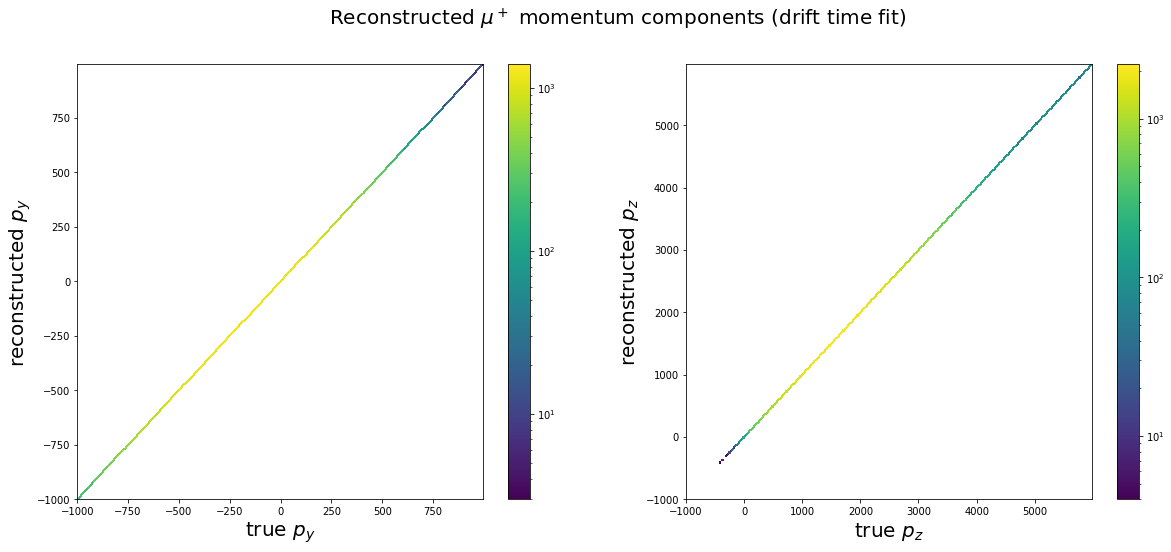

In [51]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\mu^+$ momentum components (drift time fit)")


# Plot the 2D histogram
plotter.plot_hist2d(
    x=py_true,
    # y=py_reco,
    y = pt_true * (-h * (z_true - zc_true)/R_true),
    bins_x=np.arange(-1000, 1000, 5),
    bins_y=np.arange(-1000, 1000, 5),
    xlabel=r"true $p_y$",
    ylabel=r"reconstructed $p_y$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]

plotter.next_plot()

# Plot the 2D histogram
plotter.plot_hist2d(
    x=pz_true,
    # y=pz_reco,
    y = pt_true * (h * (y_true - yc_true)/R_true),
    bins_x=np.arange(-1000, 6000, 20),
    bins_y=np.arange(-1000, 6000, 20),
    xlabel=r"true $p_z$",
    ylabel=r"reconstructed $p_z$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]

(array([ 302., 7398., 1605.,  341.,  255.,   79., 1273., 1722.,  214.,
         173.]),
 array([0.61212024, 1.1756361 , 1.73915197, 2.30266784, 2.86618371,
        3.42969958, 3.99321544, 4.55673131, 5.12024718, 5.68376305,
        6.24727892]),
 <BarContainer object of 10 artists>)

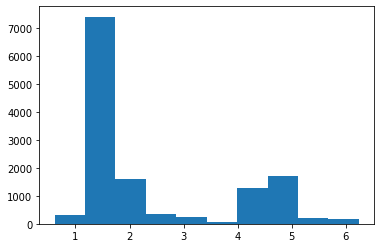

In [92]:
plt.hist(df.query("Antimuon_p_truefX > 0 & Antimuon_p_recofX < 0")["Antimuon_Phi0_true"])

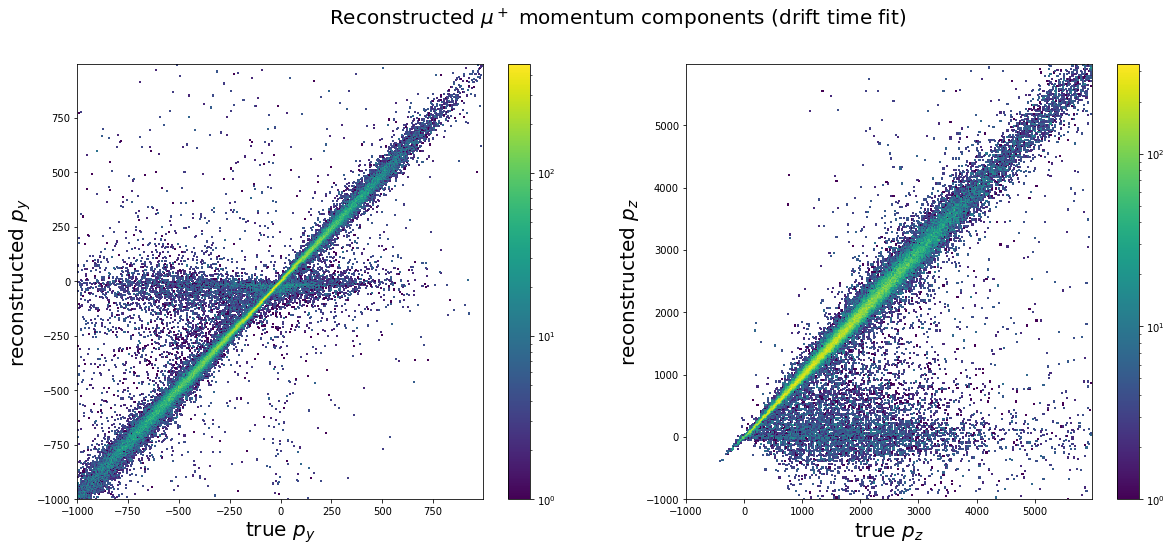

In [44]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\mu^+$ momentum components (drift time fit)")


# Plot the 2D histogram
plotter.plot_hist2d(
    x=df['Antimuon_p_truefY'],
    y=df['Antimuon_p_recofY'],
    bins_x=np.arange(-1000, 1000, 5),
    bins_y=np.arange(-1000, 1000, 5),
    xlabel=r"true $p_y$",
    ylabel=r"reconstructed $p_y$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]

plotter.next_plot()

# Plot the 2D histogram
plotter.plot_hist2d(
    x=df['Antimuon_p_truefZ'],
    y=df['Antimuon_p_recofZ'],
    bins_x=np.arange(-1000, 6000, 20),
    bins_y=np.arange(-1000, 6000, 20),
    xlabel=r"true $p_z$",
    ylabel=r"reconstructed $p_z$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]

In [37]:
import glob

In [38]:
production = glob.glob("/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/events-in-SANDtracker.*.to.*.ecal-digit.analysed.root")

In [39]:
converter = Converter(production, "digit_extended")

In [40]:
columns_df = ['FileName',
              'EventId',
              'EventType',
              'CCQEonHydrogen',
              'Interaction_vtxX',
              'Interaction_vtxY',
              'Interaction_vtxZ',
              'InteractionTarget',
              'InteractionVolume',
              'PrimaryStateHadronicSystemTopology_name',
              'NofFinalStateChargedParticles',
              'PrimaryStateHadronicSystemTotalKinE',
              'MissingTransverseMomentum',
              'ExpectedHadronSystP3',
              'ExpectedNeutronArrivalPositionECAL',
              'ExpectedFiredModuleByNeutron',
 ]

In [41]:
events = converter.CreatePandas(
    columns = columns_df,
    rename = False,
    indices = ['FileName']
)
events

,EventId,EventType,CCQEonHydrogen,Interaction_vtxX,Interaction_vtxY,Interaction_vtxZ,InteractionTarget,InteractionVolume,PrimaryStateHadronicSystemTopology_name,NofFinalStateChargedParticles,PrimaryStateHadronicSystemTotalKinE,MissingTransverseMomentum,ExpectedHadronSystP3fX,ExpectedHadronSystP3fY,ExpectedHadronSystP3fZ,ExpectedNeutronArrivalPositionECALfX,ExpectedNeutronArrivalPositionECALfY,ExpectedNeutronArrivalPositionECALfZ,ExpectedFiredModuleByNeutron
FileName,,,,,,,,,,,,,,,,,,,
events-in-SANDtracker.0.gtrac.root:gRooTracker:1,1,RES,0,1.242352,-1.403393,23.896879,C12,C3H6Target_A,n + pi-,4,0.591349,0.267179,0.368563,-0.498698,0.265994,1752.815282,-2094.092856,24265.282609,30
events-in-SANDtracker.0.gtrac.root:gRooTracker:3,3,QES,0,0.820999,-3.544753,23.587400,Au197,C3H6DriftModule_1_B_Fwire,n,1,0.046306,0.173558,0.112843,0.388360,0.184168,1683.962448,-574.776107,24995.819941,22
events-in-SANDtracker.0.gtrac.root:gRooTracker:9,9,RES,0,-1.037001,-1.725935,23.652175,C12,C3H6Target_A,n + pi-,3,0.305087,0.084040,0.413779,0.330851,0.280885,534.587010,-469.319301,24719.013778,22
events-in-SANDtracker.0.gtrac.root:gRooTracker:10,10,DIS,0,0.883028,-3.059783,24.158058,C12,C3H6Target_A,Other,4,13.259317,0.467831,-0.007376,-0.099379,0.031446,784.237801,-4390.748865,24579.207003,13
events-in-SANDtracker.0.gtrac.root:gRooTracker:15,15,RES,0,-1.013635,-2.847853,25.219540,C12,C3H6Target_X1,Other,1,0.976242,0.210935,-0.134523,-0.164562,0.035004,-1761.816272,-3763.107754,25414.226198,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.399.gtrac.root:gRooTracker:991,991,QES,0,-1.491612,-2.640649,24.380837,C12,C3H6Target_B,n,1,0.295896,0.164178,0.273556,0.282453,0.169521,163.093273,-932.130918,25406.246974,21
events-in-SANDtracker.399.gtrac.root:gRooTracker:993,993,RES,0,-1.042010,-3.543208,24.415813,C12,C3H6Target_B,n + pi-,1,0.385875,0.256484,0.026868,-0.144286,0.002748,-877.094376,-4428.841304,24432.682850,13
events-in-SANDtracker.399.gtrac.root:gRooTracker:995,995,DIS,0,1.270068,-3.868721,24.746536,C12,C3H6Target_C,Other,3,0.496586,0.246702,-0.142334,-0.200481,0.053747,996.148010,-4254.543828,24849.972957,14


In [42]:
events = events.reset_index().set_index(["FileName","EventId"])
events

,,EventType,CCQEonHydrogen,Interaction_vtxX,Interaction_vtxY,Interaction_vtxZ,InteractionTarget,InteractionVolume,PrimaryStateHadronicSystemTopology_name,NofFinalStateChargedParticles,PrimaryStateHadronicSystemTotalKinE,MissingTransverseMomentum,ExpectedHadronSystP3fX,ExpectedHadronSystP3fY,ExpectedHadronSystP3fZ,ExpectedNeutronArrivalPositionECALfX,ExpectedNeutronArrivalPositionECALfY,ExpectedNeutronArrivalPositionECALfZ,ExpectedFiredModuleByNeutron
FileName,EventId,,,,,,,,,,,,,,,,,,
events-in-SANDtracker.0.gtrac.root:gRooTracker:1,1,RES,0,1.242352,-1.403393,23.896879,C12,C3H6Target_A,n + pi-,4,0.591349,0.267179,0.368563,-0.498698,0.265994,1752.815282,-2094.092856,24265.282609,30
events-in-SANDtracker.0.gtrac.root:gRooTracker:3,3,QES,0,0.820999,-3.544753,23.587400,Au197,C3H6DriftModule_1_B_Fwire,n,1,0.046306,0.173558,0.112843,0.388360,0.184168,1683.962448,-574.776107,24995.819941,22
events-in-SANDtracker.0.gtrac.root:gRooTracker:9,9,RES,0,-1.037001,-1.725935,23.652175,C12,C3H6Target_A,n + pi-,3,0.305087,0.084040,0.413779,0.330851,0.280885,534.587010,-469.319301,24719.013778,22
events-in-SANDtracker.0.gtrac.root:gRooTracker:10,10,DIS,0,0.883028,-3.059783,24.158058,C12,C3H6Target_A,Other,4,13.259317,0.467831,-0.007376,-0.099379,0.031446,784.237801,-4390.748865,24579.207003,13
events-in-SANDtracker.0.gtrac.root:gRooTracker:15,15,RES,0,-1.013635,-2.847853,25.219540,C12,C3H6Target_X1,Other,1,0.976242,0.210935,-0.134523,-0.164562,0.035004,-1761.816272,-3763.107754,25414.226198,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.399.gtrac.root:gRooTracker:991,991,QES,0,-1.491612,-2.640649,24.380837,C12,C3H6Target_B,n,1,0.295896,0.164178,0.273556,0.282453,0.169521,163.093273,-932.130918,25406.246974,21
events-in-SANDtracker.399.gtrac.root:gRooTracker:993,993,RES,0,-1.042010,-3.543208,24.415813,C12,C3H6Target_B,n + pi-,1,0.385875,0.256484,0.026868,-0.144286,0.002748,-877.094376,-4428.841304,24432.682850,13
events-in-SANDtracker.399.gtrac.root:gRooTracker:995,995,DIS,0,1.270068,-3.868721,24.746536,C12,C3H6Target_C,Other,3,0.496586,0.246702,-0.142334,-0.200481,0.053747,996.148010,-4254.543828,24849.972957,14


In [43]:
events_signal = events[events.CCQEonHydrogen==1]
events_signal = events_signal.reset_index()

In [44]:
events_signal['FileNumber'] = [int(file.split(".")[1]) for file in events_signal['FileName']]
events_signal['EventNumber'] = events_signal['EventId']

In [45]:
events_signal = events_signal.set_index(['FileNumber', 'EventNumber'])

In [46]:
df_signal = df.loc[df.index.intersection(events_signal.index)]
df_signal

edep_file_input  \
FileNumber EventNumber                                                      
781        847          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
500        568          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
796        63           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           82           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           121          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        751          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           755          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           807          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           924          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           969          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        edep_event_index  \
FileNumber EventNumber                     
781        847                       847   
500        568                       568   
796        63                         63   
           82                         82   
           121                       121   
...                                  ...   
489        751                       751   
           755                       755   
           807                       807   
           924                       924   
           969                       969   

                                                                 FileName  \
FileNumber EventNumber                                                      
781        847          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
500        568          events-in-SANDtracker.500.gtrac.root:gRooTrack...   
796        63           events-in-SANDtracker.796.gtrac.root:gRooTrack...   
           82           events-in-SANDtracker.796.gtrac.root:gRooTrack...   
           121          events-in-SANDtracker.796.gtrac.root:gRooTrack...   
...                                                                   ...   
489        751          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           755          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           807          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           924          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           969          events-in-SANDtracker.489.gtrac.root:gRooTrack...   

                                                         digit_file_input  \
FileNumber EventNumber                                                      
781        847          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
500        568          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
796        63           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           82           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           121          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        751          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           755          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           807          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           924          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           969          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        Antimuon_pt_true  Antimuon_pt_reco  Antimuon_p_truefX  \
FileNumber EventNumber                                                          
781        847                910.861651         17.052869        -433.872787   
500        568               3581.470006       3538.323817        -143.383363   
796        63                2701.268899     133109.994273        -110.099785   
           82                3064.126865       2825.430114         268.528

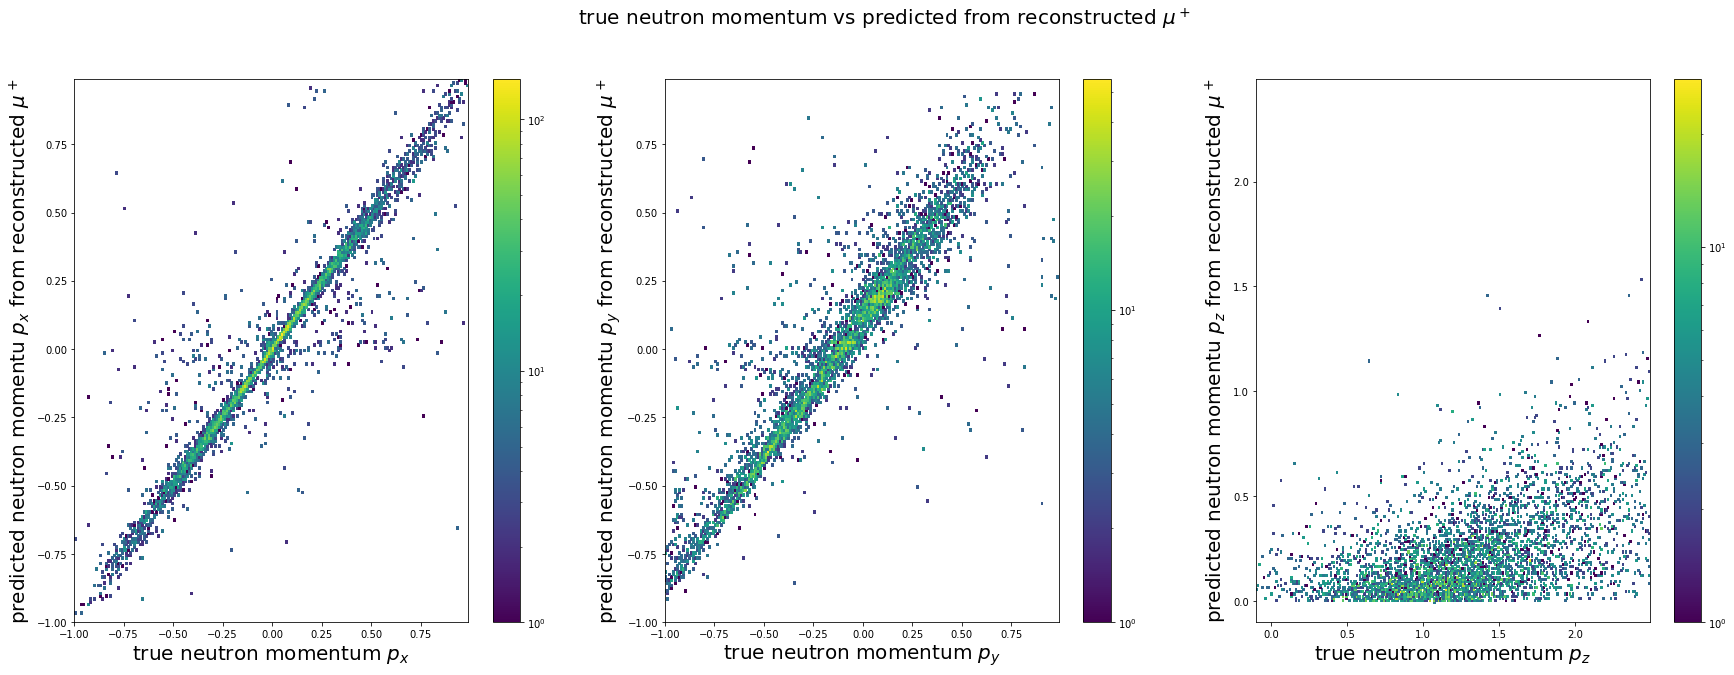

In [47]:
plotter = MultiPlotter(nrows=1, ncols=3, figsize=(30, 10), suptitle=r"true neutron momentum vs predicted from reconstructed $\mu^+$")

# First 2D histogram plot with logarithmic scale
plotter.plot_hist2d(
    x = df_signal['FinalStateHadronicSystemTotal4Momentum_fP_fX'],
    y = df_signal['PredictedNeutron_P3_GeVfX'],
    bins_x = np.arange(-1, 1, 0.01),
    bins_y = np.arange(-1, 1, 0.01),
    log_scale = True,
    xlabel = r'true neutron momentum $p_x$',
    ylabel = r'predicted neutron momentu $p_x$ from reconstructed $\mu^+$',
)
plotter.next_plot()

# Second 2D histogram plot with logarithmic scale
plotter.plot_hist2d(
    x = df_signal['PredictedNeutron_P3_GeVfY'],
    y = df_signal['FinalStateHadronicSystemTotal4Momentum_fP_fY'],
    bins_x = np.arange(-1, 1, 0.01),
    bins_y = np.arange(-1, 1, 0.01),
    log_scale = True,
xlabel = r'true neutron momentum $p_y$',
    ylabel = r'predicted neutron momentu $p_y$ from reconstructed $\mu^+$',
)
plotter.next_plot()

# Third 2D histogram plot with logarithmic scale
plotter.plot_hist2d(
    x = df_signal['PredictedNeutron_P3_GeVfZ'],
    y = df_signal['FinalStateHadronicSystemTotal4Momentum_fP_fZ'],
    bins_x = np.arange(-0.1, 2.5, 0.01),
    bins_y = np.arange(-0.1, 2.5, 0.01),
    log_scale = True,
    xlabel = r'true neutron momentum $p_z$',
    ylabel = r'predicted neutron momentu $p_z$ from reconstructed $\mu^+$',
)

In [48]:
df.columns

Index(['edep_file_input', 'edep_event_index', 'FileName', 'digit_file_input',
       'Antimuon_pt_true', 'Antimuon_pt_reco', 'Antimuon_p_truefX',
       'Antimuon_p_truefY', 'Antimuon_p_truefZ', 'Antimuon_p_recofX',
       'Antimuon_p_recofY', 'Antimuon_p_recofZ', 'Antimuon_ptot_true',
       'Antimuon_ptot_reco', 'Antimuon_dip_true', 'Antimuon_dip_reco',
       'Antimuon_Phi0_true', 'Antimuon_Phi0_reco', 'Antimuon_x0_truefX',
       'Antimuon_x0_truefY', 'Antimuon_x0_truefZ', 'Antimuon_x0_recofX',
       'Antimuon_x0_recofY', 'Antimuon_x0_recofZ', 'PredictedNeutron_P3_GeVfX',
       'PredictedNeutron_P3_GeVfY', 'PredictedNeutron_P3_GeVfZ',
       'FinalStateHadronicSystemTotal4Momentum_fP_fX',
       'FinalStateHadronicSystemTotal4Momentum_fP_fY',
       'FinalStateHadronicSystemTotal4Momentum_fP_fZ',
       'FinalStateHadronicSystemTotal4Momentum_fE', 'Antimuon_ptot_residual',
       'Antimuon_pt_residual'],
      dtype='object')

In [49]:
antimu_true = df[['Antimuon_p_truefX','Antimuon_p_truefY','Antimuon_p_truefZ']]

In [50]:
antimu_reco = df[['Antimuon_p_truefX','Antimuon_p_truefY','Antimuon_p_truefZ']]

In [51]:
antimu_true

Antimuon_p_truefX  Antimuon_p_truefY  \
FileNumber EventNumber                                         
781        67                 -253.912182          34.321135   
           132                 -92.446478         517.337308   
           166                 -67.140961        -460.529729   
           197                 561.242016        -269.744670   
           256                 618.720935         -85.336197   
...                                   ...                ...   
489        993                 196.309932        -529.009536   
           995                 483.452335          97.273334   
           996                -581.049102         -32.845904   
           997                 391.728427        -897.002394   
           998                 -42.587706        -876.265685   

                        Antimuon_p_truefZ  
FileNumber EventNumber                     
781        67                  520.970074  
           132                 843.314265  
           166                2205.882531  
           197                1479.347104  
           256                1219.631422  
...                                   ...  
489        993                4097.732929  
           995                1829.314813  
           996                 278.149415  
           997                3442.092970  
           998                2421.877453  

[280207 rows x 3 columns]

In [52]:
df

edep_file_input  \
FileNumber EventNumber                                                      
781        67           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           132          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           166          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           197          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           256          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        993          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           995          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           996          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           997          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           998          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        edep_event_index  \
FileNumber EventNumber                     
781        67                         67   
           132                       132   
           166                       166   
           197                       197   
           256                       256   
...                                  ...   
489        993                       993   
           995                       995   
           996                       996   
           997                       997   
           998                       998   

                                                                 FileName  \
FileNumber EventNumber                                                      
781        67           events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           132          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           166          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           197          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           256          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
...                                                                   ...   
489        993          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           995          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           996          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           997          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           998          events-in-SANDtracker.489.gtrac.root:gRooTrack...   

                                                         digit_file_input  \
FileNumber EventNumber                                                      
781        67           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           132          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           166          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           197          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           256          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        993          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           995          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           996          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           997          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           998          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        Antimuon_pt_true  Antimuon_pt_reco  Antimuon_p_truefX  \
FileNumber EventNumber                                                          
781        67                 522.099376         10.420764        -253.912182   
           132                989.351727       1013.015214         -92.446478   
           166               2253.443004        742.751889         -67.140961   
           197               1503.738688        645.533536         561.242